# walmart

In [79]:
import sys

In [80]:
# imoports
import math


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

In [83]:
# constants

FEATURES_DATA_FILE = '../data/features.csv'
STORES_DATA_FILE = '../data/stores.csv'
TRAIN_DATA_FILE = '../data/train.csv'

## Load the data

In [84]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [85]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

In [86]:
# view_df = train_original_df.copy()

# view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
# view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
# view_df["DN"] = view_df["DN"] - view_df["DN"].min()

# view_df = view_df.sort_values(by=["DN"])

# for store in view_df["Store"].sort_values().unique():
#     if int(store) in [1, 3, 5]:
#         x = view_df[view_df["Store"] == store]["DN"]
#         y = view_df[view_df["Store"] == store]["Weekly_Sales"]
#         plt.plot(x, y)



In [87]:
df = train_original_df.copy()

In [88]:
# SINGLE_STORE = False

# if SINGLE_STORE:
#     df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [89]:
features_df.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [90]:
store_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [91]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [92]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
original_df = df.copy()

### why we removing features with missing values

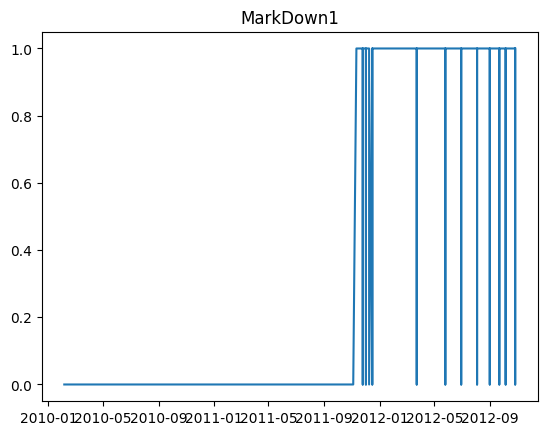

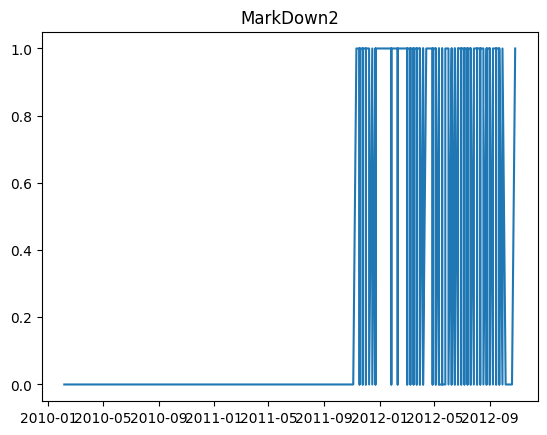

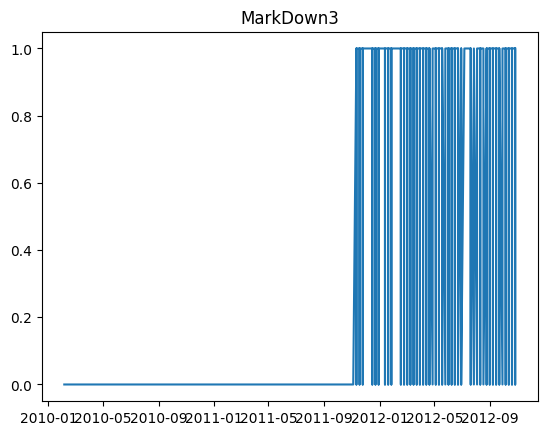

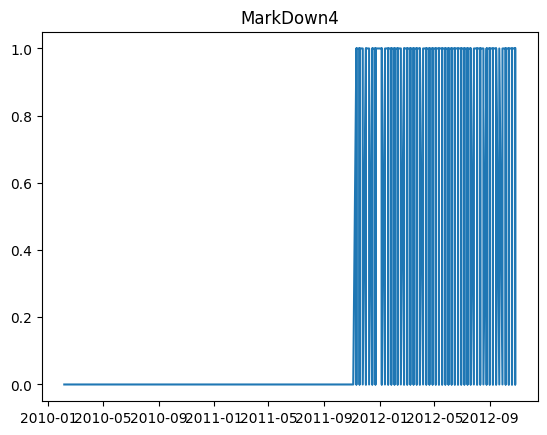

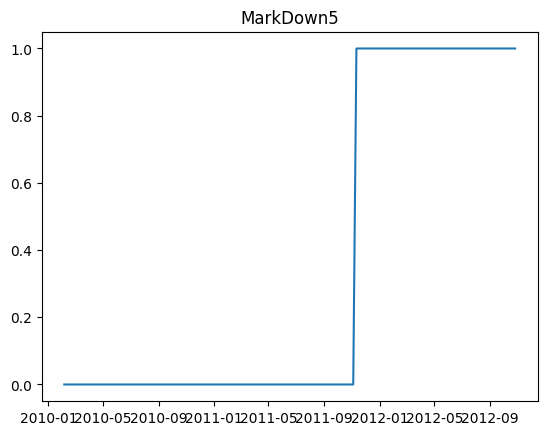

In [93]:
x = df.sort_values(by=["Date"])["Date"]


for column in df.columns:
    if df[column].isna().sum() > 0:
        plt.title(column)
        plt.plot(x, df.sort_values(by=["Date"])[column].isna().astype(int) * -1 + 1)
        plt.show()


As you can see, the MarkDown columns have lots of missing values in hafe of the weeks of the data

In [94]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0           1     1 2010-02-05      24924.50        False    A  151315   
1           1     1 2010-02-12      46039.49         True    A  151315   
2           1     1 2010-02-19      41595.55        False    A  151315   
3           1     1 2010-02-26      19403.54        False    A  151315   
4           1     1 2010-03-05      21827.90        False    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421565     45    98 2012-09-28        508.37        False    B  118221   
421566     45    98 2012-10-05        628.10        False    B  118221   
421567     45    98 2012-10-12       1061.02        False    B  118221   
421568     45    98 2012-10-19        760.01        False    B  118221   
421569     45    98 2012-10-26       1076.80        False    B  118221   

        Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0             42.31       2.572  211.096358         8.106        False  
1             38.51       2.548  211.242170         8.106         True  
2             39.93       2.514  211.289143         8.106        False  
3             46.63       2.561  211.319643         8.106        False  
4             46.50       2.625  211.350143         8.106        False  
...             ...         ...         ...           ...          ...  
421565        64.88       3.997  192.013558         8.684        False  
421566        64.89       3.985  192.170412         8.667        False  
421567        54.47       4.000  192.327265         8.667        False  
421568        56.47       3.969  192.330854         8.667        False  
421569        58.85       3.882  192.308899         8.667        False  

[421570 rows x 12 columns]

## First Describe of the data

In [95]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     1 2010-02-12      46039.49         True    A  151315   
2      1     1 2010-02-19      41595.55        False    A  151315   
3      1     1 2010-02-26      19403.54        False    A  151315   
4      1     1 2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0        42.31       2.572  211.096358         8.106        False  
1        38.51       2.548  211.242170         8.106         True  
2        39.93       2.514  211.289143         8.106        False  
3        46.63       2.561  211.319643         8.106        False  
4        46.50       2.625  211.350143         8.106        False

In [96]:
df.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  140167.000000      62.090000       3.452000   
75%     20205.852500  202505.000000      74.280000       3.738000   
max    693099.360000  219622.000000     100.140000       4.468000   
std     22711.183519   60980.583328      18.447931       0.458515   

                 CPI   Unemployment  
count  421570.000000  421570.000000  
mean      171.201947       7.960289  
min       126.064000       3.879000  
25%       132.022667       6.891000  
50%       182.318780       7.866000  
75%       212.416993       8.572000  
max       227.232807      14.313000  
std        39.159276       1.863296

In [97]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [98]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [99]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [100]:
df

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
0           1     1 2010-02-05      24924.50        42.31       2.572   
1           1     1 2010-02-12      46039.49        38.51       2.548   
2           1     1 2010-02-19      41595.55        39.93       2.514   
3           1     1 2010-02-26      19403.54        46.63       2.561   
4           1     1 2010-03-05      21827.90        46.50       2.625   
...       ...   ...        ...           ...          ...         ...   
421565     45    98 2012-09-28        508.37        64.88       3.997   
421566     45    98 2012-10-05        628.10        64.89       3.985   
421567     45    98 2012-10-12       1061.02        54.47       4.000   
421568     45    98 2012-10-19        760.01        56.47       3.969   
421569     45    98 2012-10-26       1076.80        58.85       3.882   

               CPI  Unemployment  IsHoliday  Store-Type  Store-Size  
0       211.096358         8.106      False           1      151315  
1       211.242170         8.106       True           1      151315  
2       211.289143         8.106      False           1      151315  
3       211.319643         8.106      False           1      151315  
4       211.350143         8.106      False           1      151315  
...            ...           ...        ...         ...         ...  
421565  192.013558         8.684      False           2      118221  
421566  192.170412         8.667      False           2      118221  
421567  192.327265         8.667      False           2      118221  
421568  192.330854         8.667      False           2      118221  
421569  192.308899         8.667      False           2      118221  

[421570 rows x 11 columns]

In [101]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [102]:
for i in range(1, 5):
    df["Weekly-Sales-last-" + str(i) + "-weeks"] = df["Weekly_Sales"].shift(i)

for i in range(1, 4):
    df["Weekly-Diff-last-" + str(i) + "-weeks"] = df["Weekly-Sales-last-" + str(i) + "-weeks"] - df["Weekly-Sales-last-" + str(i+1) + "-weeks"]

df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(6).index)

In [103]:
for i in range(4):
    df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(i+1)].index)

In [104]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [105]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [106]:
df = df.drop(columns=["Store-Dept"])

In [107]:
df = df.drop(columns=["Weekly_Sales"])

In [108]:
df

Store  Dept       Date  Temperature  Fuel_Price         CPI  \
index-2                                                                
16           1     1 2010-05-28        80.44       2.759  210.896761   
17           1     1 2010-06-04        80.69       2.705  211.176428   
18           1     1 2010-06-11        80.43       2.668  211.456095   
19           1     1 2010-06-18        84.11       2.637  211.453772   
20           1     1 2010-06-25        84.34       2.653  211.338653   
...        ...   ...        ...          ...         ...         ...   
87500        9    96 2012-10-26        69.52       3.506  227.232807   
87520        9    98 2011-12-23        44.43       3.112  223.066113   
87521        9    98 2012-01-06        47.54       3.157  223.433241   
87522        9    98 2012-01-27        49.38       3.290  223.806053   
87523        9    98 2012-05-18        69.52       3.630  225.494250   

         Unemployment  IsHoliday  Store-Type  Store-Size  \
index-2                                                    
16              7.808          0           1      151315   
17              7.808          0           1      151315   
18              7.808          0           1      151315   
19              7.808          0           1      151315   
20              7.808          0           1      151315   
...               ...        ...         ...         ...   
87500           4.954          0           2      125833   
87520           6.054          0           2      125833   
87521           5.667          0           2      125833   
87522           5.667          0           2      125833   
87523           5.539          0           2      125833   

         Weekly-Sales-last-1-weeks  Weekly-Sales-last-2-weeks  \
index-2                                                         
16                        14773.04                   18926.74   
17                        15580.43                   14773.04   
18                        17558.09                   15580.43   
19                        16637.62                   17558.09   
20                        16216.27                   16637.62   
...                            ...                        ...   
87500                      3540.05                    3675.99   
87520                        66.75                      75.77   
87521                        25.50                      66.75   
87522                         0.50                      25.50   
87523                        -1.00                       0.50   

         Weekly-Sales-last-3-weeks  Weekly-Sales-last-4-weeks  \
index-2                                                         
16                        17413.94                   16555.11   
17                        18926.74                   17413.94   
18                        14773.04                   18926.74   
19                        15580.43                   14773.04   
20                        17558.09                   15580.43   
...                            ...                        ...   
87500                      4306.43                    3763.21   
87520                        54.75                      60.75   
87521                        75.77                      54.75   
87522                        66.75                      75.77   
87523                        25.50                      66.75   

         Weekly-Diff-last-1-weeks  Weekly-Diff-last-2-weeks  \
index-2                                                       
16                       -4153.70                   1512.80   
17                         807.39                  -4153.70   
18                        1977.66                    807.39   
19                        -920.47                   1977.66   
20                        -421.35                   -920.47   
...                           ...                       ...   
87500                     -135.94                   -630.44   
87520                       -9.0

# split to train and test

In [109]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = df[df["Date"] > limit_date].copy()
df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [110]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [111]:
df["Date"].sort_values().unique()

<DatetimeArray>
['2010-04-16 00:00:00', '2010-04-23 00:00:00', '2010-04-30 00:00:00',
 '2010-05-07 00:00:00', '2010-05-14 00:00:00', '2010-05-21 00:00:00',
 '2010-05-28 00:00:00', '2010-06-04 00:00:00', '2010-06-11 00:00:00',
 '2010-06-18 00:00:00',
 ...
 '2012-02-24 00:00:00', '2012-03-02 00:00:00', '2012-03-09 00:00:00',
 '2012-03-16 00:00:00', '2012-03-23 00:00:00', '2012-03-30 00:00:00',
 '2012-04-06 00:00:00', '2012-04-13 00:00:00', '2012-04-20 00:00:00',
 '2012-04-27 00:00:00']
Length: 107, dtype: datetime64[ns]

In [112]:
train_df["Date"].sort_values().unique()

<DatetimeArray>
['2010-04-16 00:00:00', '2010-04-23 00:00:00', '2010-04-30 00:00:00',
 '2010-05-07 00:00:00', '2010-05-14 00:00:00', '2010-05-21 00:00:00',
 '2010-05-28 00:00:00', '2010-06-04 00:00:00', '2010-06-11 00:00:00',
 '2010-06-18 00:00:00', '2010-06-25 00:00:00', '2010-07-02 00:00:00',
 '2010-07-09 00:00:00', '2010-07-16 00:00:00', '2010-07-23 00:00:00',
 '2010-07-30 00:00:00', '2010-08-06 00:00:00', '2010-08-13 00:00:00',
 '2010-08-20 00:00:00', '2010-08-27 00:00:00', '2010-09-03 00:00:00',
 '2010-09-10 00:00:00', '2010-09-17 00:00:00', '2010-09-24 00:00:00',
 '2010-10-01 00:00:00', '2010-10-08 00:00:00', '2010-10-15 00:00:00',
 '2010-10-22 00:00:00', '2010-10-29 00:00:00', '2010-11-05 00:00:00',
 '2010-11-12 00:00:00', '2010-11-19 00:00:00', '2010-11-26 00:00:00',
 '2010-12-03 00:00:00', '2010-12-10 00:00:00', '2010-12-17 00:00:00',
 '2010-12-24 00:00:00', '2010-12-31 00:00:00', '2011-01-07 00:00:00',
 '2011-01-14 00:00:00', '2011-01-21 00:00:00', '2011-01-28 00:00:00',
 '20

In [113]:
test_df["Date"].sort_values().unique()

<DatetimeArray>
['2011-12-09 00:00:00', '2011-12-16 00:00:00', '2011-12-23 00:00:00',
 '2011-12-30 00:00:00', '2012-01-06 00:00:00', '2012-01-13 00:00:00',
 '2012-01-20 00:00:00', '2012-01-27 00:00:00', '2012-02-03 00:00:00',
 '2012-02-10 00:00:00', '2012-02-17 00:00:00', '2012-02-24 00:00:00',
 '2012-03-02 00:00:00', '2012-03-09 00:00:00', '2012-03-16 00:00:00',
 '2012-03-23 00:00:00', '2012-03-30 00:00:00', '2012-04-06 00:00:00',
 '2012-04-13 00:00:00', '2012-04-20 00:00:00', '2012-04-27 00:00:00']
Length: 21, dtype: datetime64[ns]

In [114]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [115]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [116]:
train_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0      0      1     1 2010-05-28        80.44       2.759  210.896761   
1      1      1     1 2010-06-04        80.69       2.705  211.176428   
2      2      1     1 2010-06-11        80.43       2.668  211.456095   
3      3      1     1 2010-06-18        84.11       2.637  211.453772   
4      4      1     1 2010-06-25        84.34       2.653  211.338653   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.808          0           1    0.233352                   14773.04   
1         7.808          0           1    0.233352                   15580.43   
2         7.808          0           1    0.233352                   17558.09   
3         7.808          0           1    0.233352                   16637.62   
4         7.808          0           1    0.233352                   16216.27   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   18926.74                   17413.94   
1                   14773.04                   18926.74   
2                   15580.43                   14773.04   
3                   17558.09                   15580.43   
4                   16637.62                   17558.09   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   16555.11                  -4153.70   
1                   17413.94                    807.39   
2                   18926.74                   1977.66   
3                   14773.04                   -920.47   
4                   15580.43                   -421.35   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1512.80                    858.83       807.39  
1                  -4153.70                   1512.80      1977.66  
2                    807.39                  -4153.70      -920.47  
3                   1977.66                    807.39      -421.35  
4                   -920.47                   1977.66       112.45

In [117]:
test_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0     80      1     1 2011-12-09        43.93       3.158  218.961846   
1     81      1     1 2011-12-16        51.63       3.159  219.179453   
2     82      1     1 2011-12-23        47.96       3.112  219.357722   
3     83      1     1 2011-12-30        44.55       3.129  219.535990   
4     84      1     1 2012-01-06        49.01       3.157  219.714258   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.866          0           1    0.233352                   25293.49   
1         7.866          0           1    0.233352                   33305.92   
2         7.866          0           1    0.233352                   45773.03   
3         7.866          1           1    0.233352                   46788.75   
4         7.348          0           1    0.233352                   23350.88   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   20911.25                   19050.66   
1                   25293.49                   20911.25   
2                   33305.92                   25293.49   
3                   45773.03                   33305.92   
4                   46788.75                   45773.03   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   18689.54                   4382.24   
1                   19050.66                   8012.43   
2                   20911.25                  12467.11   
3                   25293.49                   1015.72   
4                   33305.92                 -23437.87   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1860.59                    361.12      8012.43  
1                   4382.24                   1860.59     12467.11  
2                   8012.43                   4382.24      1015.72  
3                  12467.11                   8012.43    -23437.87  
4                   1015.72                  12467.11     -6783.19

## Visualize the data

In [118]:
def date_show(date_value):
    return str(date_value).split(" ")[0].split('-')[2] + '-' + str(date_value).split(" ")[0].split('-')[1]

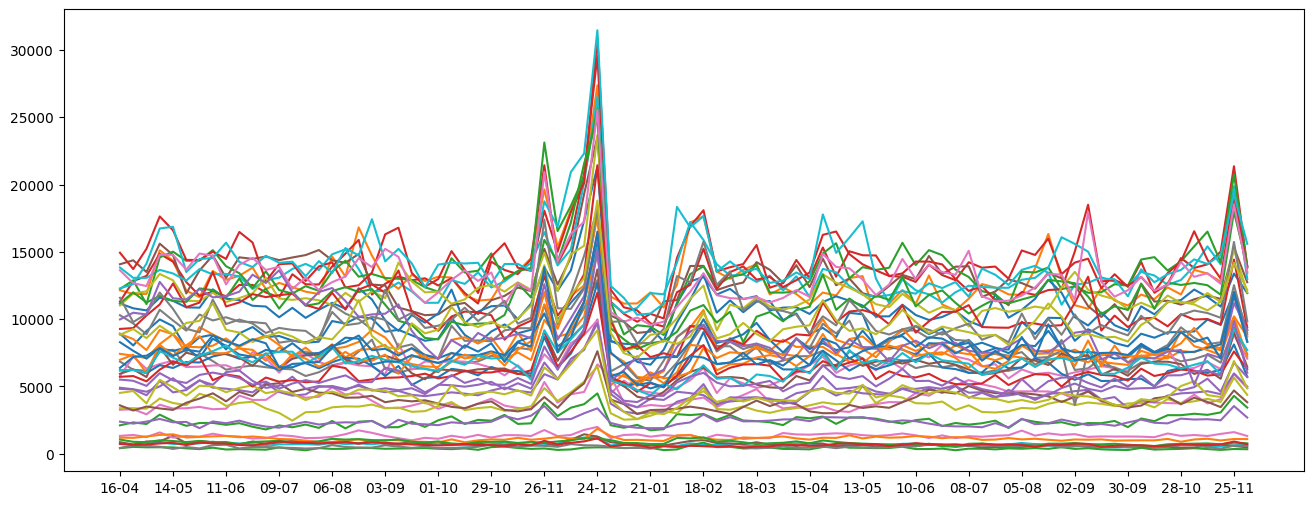

In [119]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

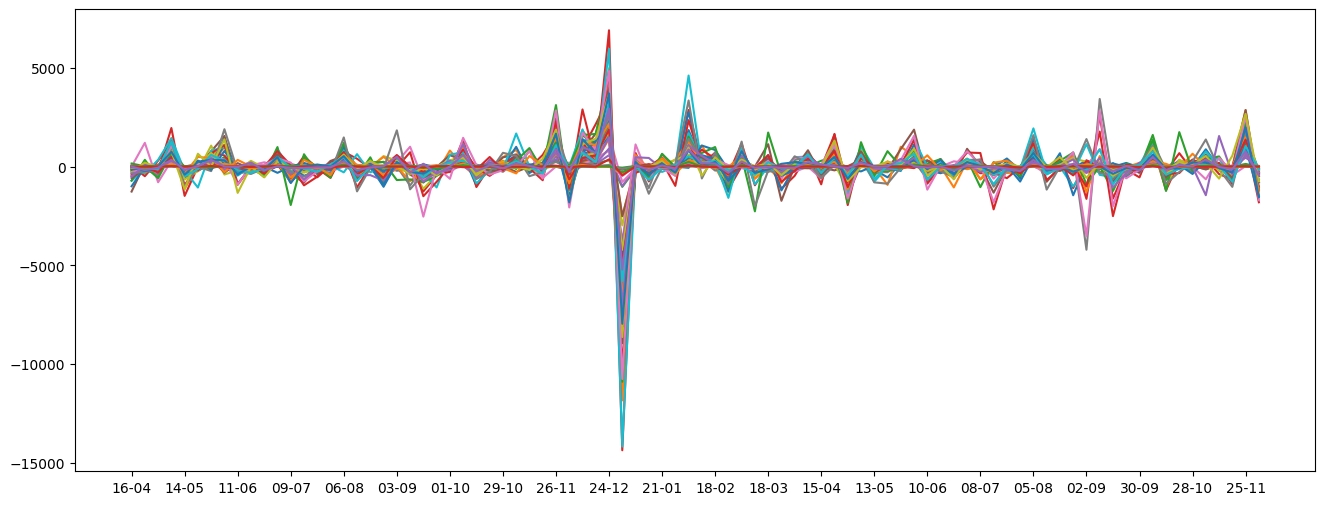

In [120]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

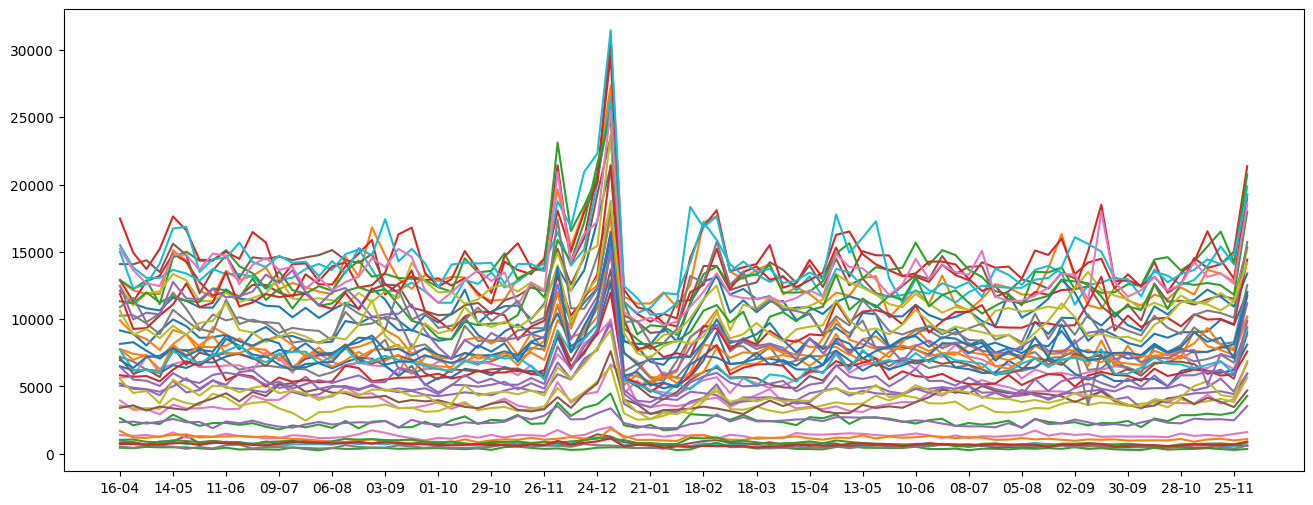

In [121]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

We now known that the weeks of Thanksgiving Day and Christmas are extreme for sales for walmart

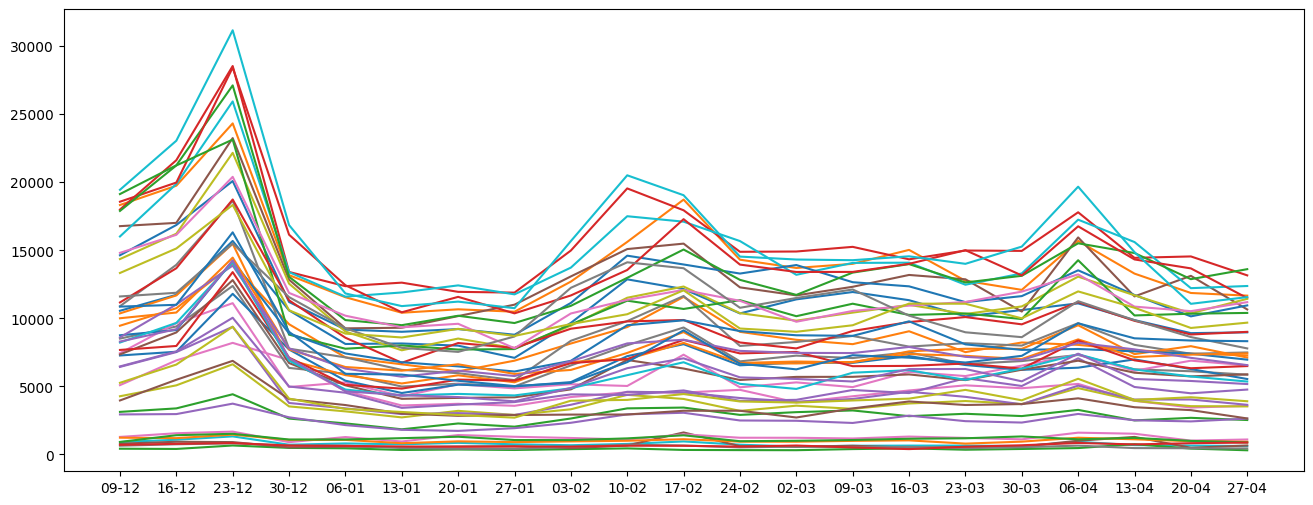

In [122]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

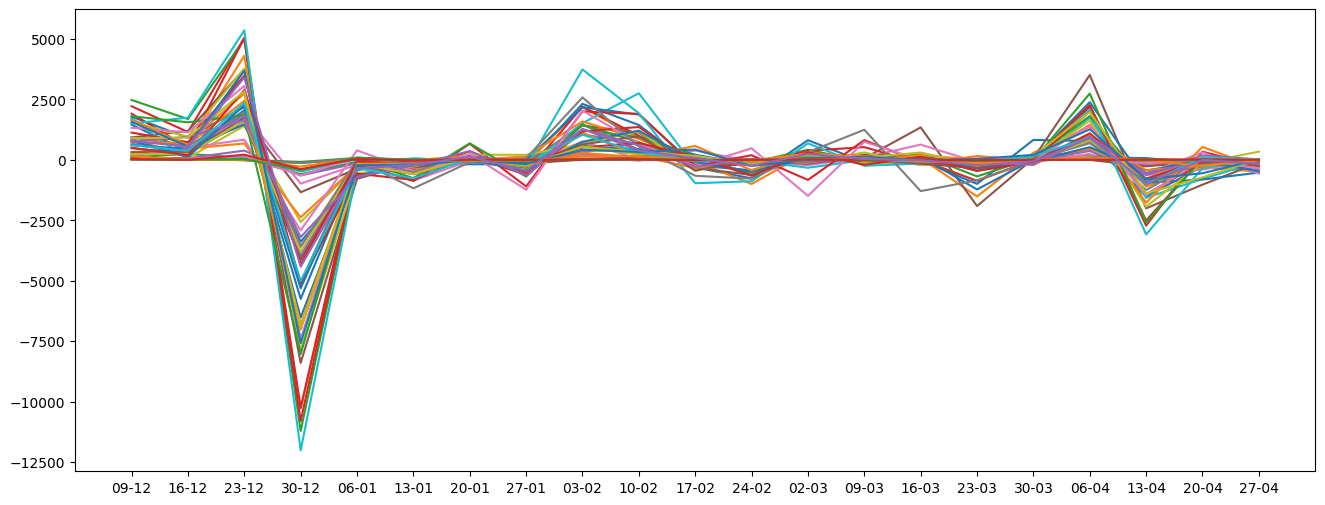

In [123]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

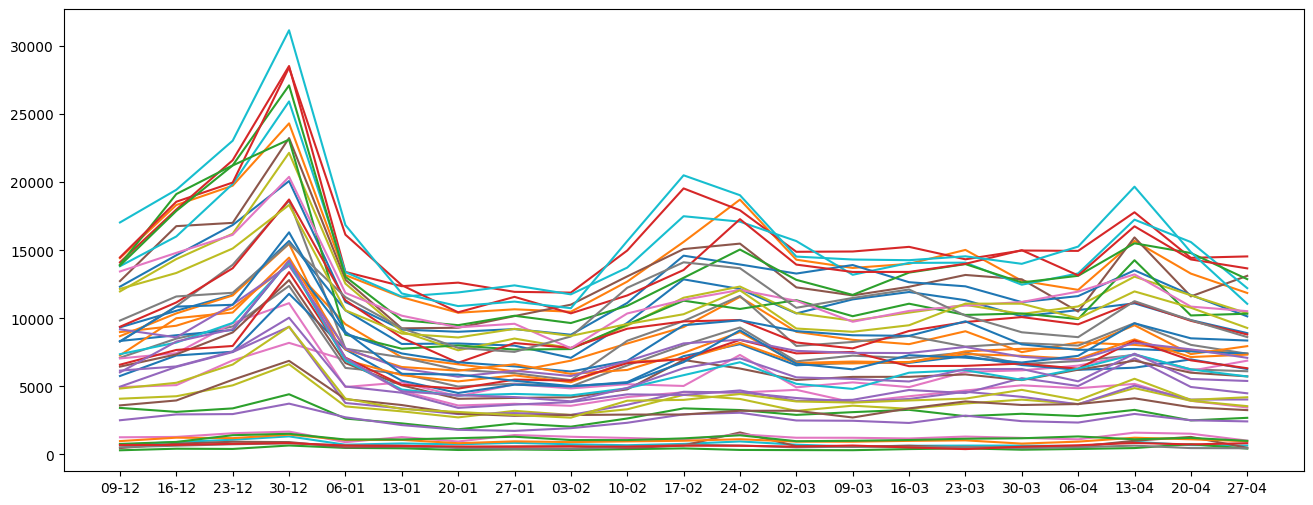

In [124]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

other

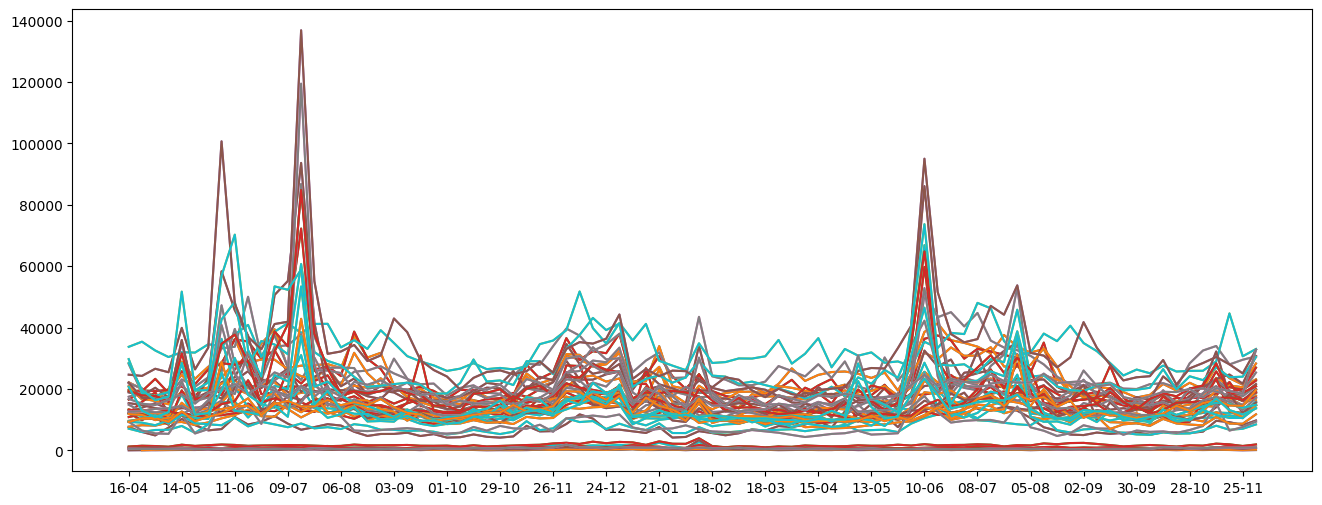

In [125]:
DEPT = 11

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[(view_df["Store"] == store) & (view_df["Dept"] == DEPT)]

    labels = store_view_df["Date"].apply(date_show)
    x = store_view_df["DN"]
    y = store_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

    plt.plot(x, y)

plt.show()

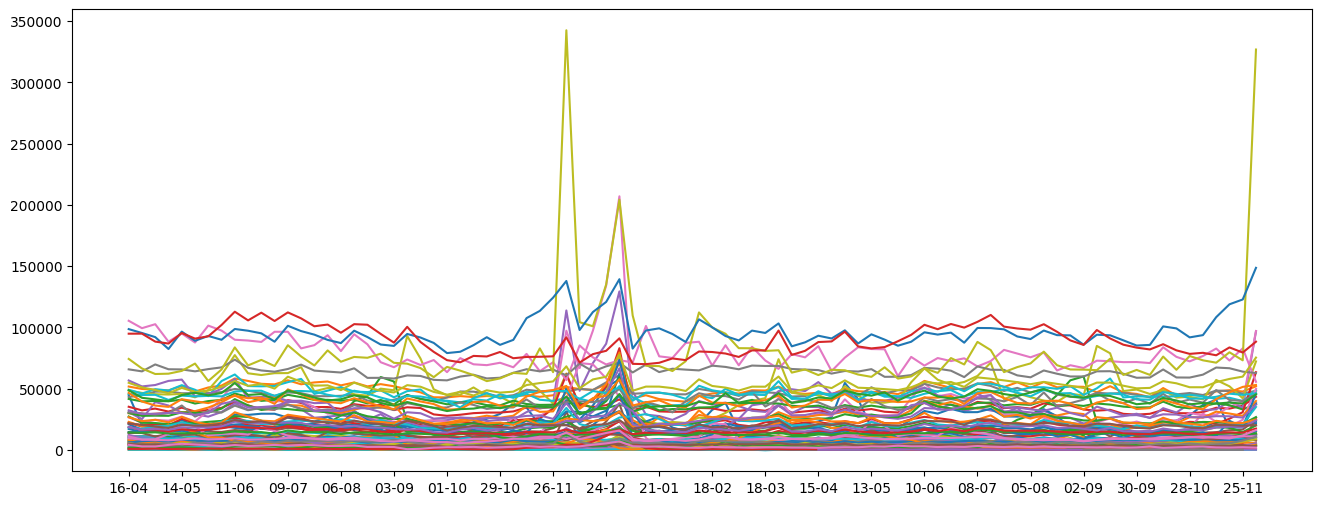

In [126]:
STORE = 6

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for dept in view_df["Dept"].sort_values().unique():
    dept_view_df = view_df[(view_df["Store"] == STORE) & (view_df["Dept"] == dept)]

    labels = dept_view_df["Date"].apply(date_show)
    x = dept_view_df["DN"]
    y = dept_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

plt.show()

adding year as sin and cos

In [127]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

train_df['Year-Sin'] = np.sin(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
train_df['Year-Cos'] = np.cos(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

test_df['Year-Sin'] = np.sin(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
test_df['Year-Cos'] = np.cos(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

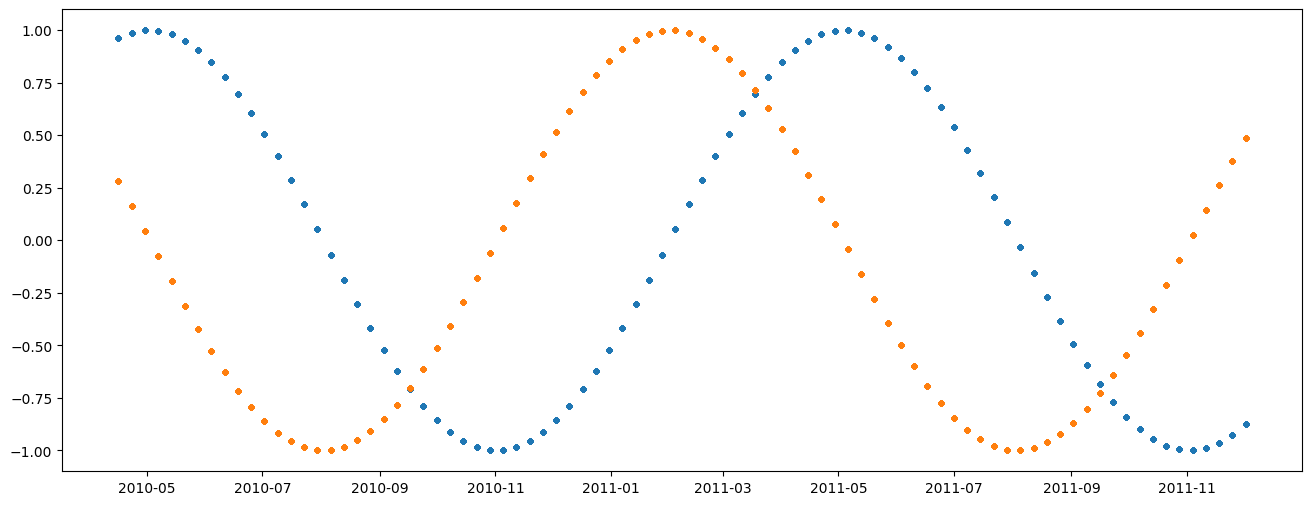

In [128]:
plt.figure(figsize=(16, 6))

plt.plot(train_df["Date"], train_df["Year-Sin"], '.')
plt.plot(train_df["Date"], train_df["Year-Cos"], '.')

plt.show()

## Model LinearRegression

In [171]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [172]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

/tmp/ipykernel_17221/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_17221/2157136067.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
/tmp/ipykernel_17221/2157136067.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

In [173]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [174]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-1-weeks',
       ...
       'Dept-93', 'Dept-94', 'Dept-95', 'Dept-96', 'Dept-97', 'Dept-98',
       'Dept-99', 'Dept-50', 'Dept-78', 'Dept-65'],
      dtype='object', length=142)

In [175]:
train_1_df.columns.size, test_1_df.columns.size

(142, 142)

In [176]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [177]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [178]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


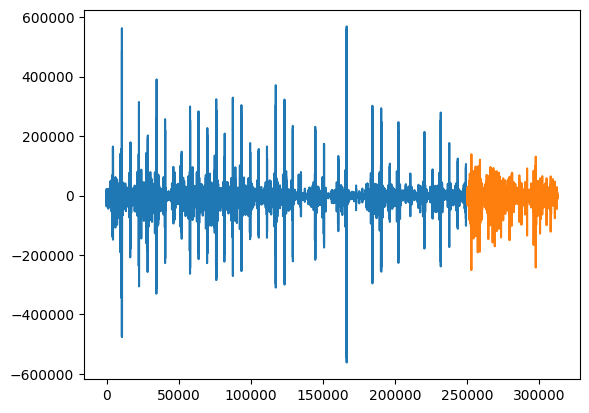

In [179]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [180]:
y_train.min(), y_test.min()

(-561345.54, -250560.69)

In [181]:
y_train.describe()

count    250289.000000
mean          8.252600
std        8246.597466
min     -561345.540000
25%        -630.130000
50%           1.530000
75%         670.340000
max      568347.700000
Name: Weekly-Diff, dtype: float64

In [182]:
# min_norm = y_train.min()
# max_norm = y_train.max()

# y_train = (y_train - min_norm) / (max_norm - min_norm)
# y_test = (y_test - min_norm) / (max_norm - min_norm)

mean_norm = y_train.mean()
std_norm = y_train.std()

y_train = (y_train - mean_norm) / std_norm
y_test = (y_test - mean_norm) / std_norm

In [183]:
y_train.describe()

count    2.502890e+05
mean    -9.119932e-19
std      1.000000e+00
min     -6.807096e+01
25%     -7.741164e-02
50%     -8.151968e-04
75%      8.028613e-02
max      6.891805e+01
Name: Weekly-Diff, dtype: float64

In [184]:
x_train.describe()

index          Date    Temperature     Fuel_Price  \
count  250289.000000  2.502890e+05  250289.000000  250289.000000   
mean   156205.058488  1.297193e+18      61.585433       3.257915   
std     90216.451196  1.499528e+16      18.457818       0.440627   
min         0.000000  1.271376e+18      -2.060000       2.513000   
25%     78117.000000  1.284077e+18      48.720000       2.841000   
50%    156184.000000  1.297382e+18      64.190000       3.232000   
75%    234323.000000  1.310083e+18      75.320000       3.638000   
max    312504.000000  1.322784e+18     100.140000       4.211000   

                 CPI   Unemployment      IsHoliday     Store-Type  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean      169.560455       8.216114       0.070263       1.586522   
std        38.424753       1.873331       0.255590       0.664023   
min       126.064000       4.420000       0.000000       1.000000   
25%       132.364839       7.274000       0.000000       1.000000   
50%       182.380600       8.021000       0.000000       1.000000   
75%       211.169023       8.625000       0.000000       2.000000   
max       222.397544      14.313000       1.000000       3.000000   

         Store-Size  Weekly-Sales-last-1-weeks  ...        Dept-93  \
count  2.502890e+05              250289.000000  ...  250289.000000   
mean   7.903467e-17               16084.005536  ...       0.014052   
std    1.000000e+00               22799.863091  ...       0.117705   
min   -1.680818e+00               -4988.940000  ...       0.000000   
25%   -7.148066e-01                2228.900000  ...       0.000000   
50%    5.008847e-02                7783.090000  ...       0.000000   
75%    1.074869e+00               20349.200000  ...       0.000000   
max    1.356257e+00              693099.360000  ...       1.000000   

             Dept-94        Dept-95        Dept-96        Dept-97  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013037       0.015462       0.011255       0.015027   
std         0.113433       0.123382       0.105491       0.121659   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-98        Dept-99        Dept-50        Dept-78  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013596       0.000212       0.003676       0.000008   
std         0.115808       0.014550       0.060517       0.002827   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-65  
count  250289.000000  
mean        0.000344  
std         0.018533  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 141 columns]

In [185]:
# for column in x_train.columns:
#     if x_train[column].max() > 1:
#         x_min_norm = x_train[column].min()
#         x_max_norm = x_train[column].max()

#         x_train[column] = (x_train[column] - x_min_norm) / (x_max_norm - x_min_norm)
#         x_test[column] = (x_test[column] - x_min_norm) / (x_max_norm - x_min_norm)

for column in x_train.columns:
    if x_train[column].max() > 1:
        x_mean_norm = x_train[column].mean()
        x_std_norm = x_train[column].std()

        x_train[column] = (x_train[column] - x_mean_norm) / x_std_norm
        x_test[column] = (x_test[column] - x_mean_norm) / x_std_norm

In [186]:
x_train.describe()

index          Date   Temperature    Fuel_Price           CPI  \
count  2.502890e+05  2.502890e+05  2.502890e+05  2.502890e+05  2.502890e+05   
mean   3.197725e-16 -1.134153e-14  1.816889e-17  9.447823e-17  1.453511e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.731448e+00 -1.721644e+00 -3.448156e+00 -1.690582e+00 -1.131990e+00   
25%   -8.655634e-01 -8.746572e-01 -6.970181e-01 -9.461875e-01 -9.680118e-01   
50%   -2.334218e-04  1.266225e-02  1.411091e-01 -5.881479e-02  3.336429e-01   
75%    8.658946e-01  8.596490e-01  7.441057e-01  8.626003e-01  1.082858e+00   
max    1.732488e+00  1.706636e+00  2.088793e+00  2.163021e+00  1.375079e+00   

       Unemployment      IsHoliday    Store-Type    Store-Size  \
count  2.502890e+05  250289.000000  2.502890e+05  2.502890e+05   
mean  -2.979698e-16       0.070263  2.325618e-16  3.224978e-17   
std    1.000000e+00       0.255590  1.000000e+00  1.000000e+00   
min   -2.026398e+00       0.000000 -8.832858e-01 -1.680818e+00   
25%   -5.029085e-01       0.000000 -8.832858e-01 -7.148066e-01   
50%   -1.041535e-01       0.000000 -8.832858e-01  5.008847e-02   
75%    2.182669e-01       0.000000  6.226864e-01  1.074869e+00   
max    3.254570e+00       1.000000  2.128659e+00  1.356257e+00   

       Weekly-Sales-last-1-weeks  ...        Dept-93        Dept-94  \
count               2.502890e+05  ...  250289.000000  250289.000000   
mean               -4.542223e-18  ...       0.014052       0.013037   
std                 1.000000e+00  ...       0.117705       0.113433   
min                -9.242575e-01  ...       0.000000       0.000000   
25%                -6.076837e-01  ...       0.000000       0.000000   
50%                -3.640774e-01  ...       0.000000       0.000000   
75%                 1.870711e-01  ...       0.000000       0.000000   
max                 2.969383e+01  ...       1.000000       1.000000   

             Dept-95        Dept-96        Dept-97        Dept-98  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.015462       0.011255       0.015027       0.013596   
std         0.123382       0.105491       0.121659       0.115808   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-99        Dept-50        Dept-78        Dept-65  
count  250289.000000  250289.000000  250289.000000  250289.000000  
mean        0.000212       0.003676       0.000008       0.000344  
std         0.014550       0.060517       0.002827       0.018533  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 141 columns]

In [187]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [188]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([250289, 141]),
 torch.Size([250289]),
 torch.Size([62240, 141]),
 torch.Size([62240]))

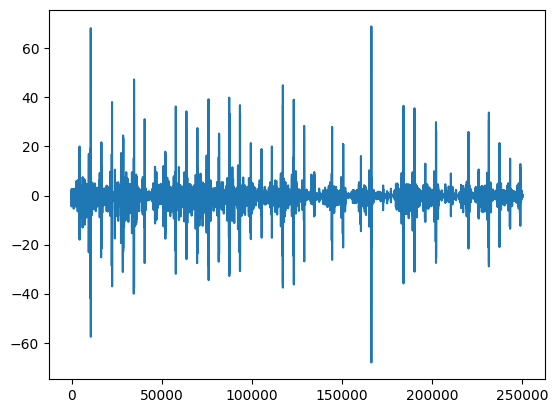

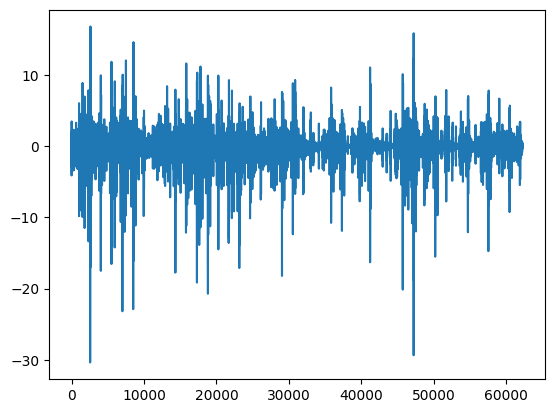

In [189]:
plt.plot(range(len(y_train)), y_train)
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.show()

In [190]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


def train_linear_regression_model(x_train, y_train, x_val, y_val, model, loss_fn, loss_fn_vall, num_epochs, batch_size):
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32), 
                                                   torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(x_val, dtype=torch.float32), 
                                                 torch.tensor(y_val, dtype=torch.float32))
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    losses = []
    losses_val = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss_train = loss_fn(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

            running_loss += np.sqrt(loss_train.item())

        losses.append(running_loss / len(train_loader))

        # Validation loss
        running_loss = 0

        for batch in val_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss_val = loss_fn_vall(outputs, targets)

            running_loss += np.sqrt(loss_val.item())

        losses_val.append(running_loss / len(val_loader))

        if epoch % int(num_epochs / 10) == 0:
            print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses, losses_val



linear_regression_model = LinearRegression(input_size=x_train.shape[1])
loss_fn = torch.nn.MSELoss()
loss_fn_vall = torch.nn.MSELoss()

batch_size = 128

losses, losses_val = train_linear_regression_model(x_train, y_train, x_test, y_test, linear_regression_model, loss_fn, loss_fn_vall, 30, batch_size)

/tmp/ipykernel_17221/1847810876.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32),
/tmp/ipykernel_17221/1847810876.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.float32))
/tmp/ipykernel_17221/1847810876.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = torch.utils.data.TensorDataset(torch.tensor(x_val, dtype=torch.float32),
/tmp/ipykernel_17221/1847810876.py:22: UserWarning: To copy constru

Epoch [0], Running Loss: 392.3874
Epoch [3], Running Loss: 395.1676
Epoch [6], Running Loss: 392.9893
Epoch [9], Running Loss: 394.5405
Epoch [12], Running Loss: 390.1039
Epoch [15], Running Loss: 394.1398
Epoch [18], Running Loss: 394.7082
Epoch [21], Running Loss: 394.4488
Epoch [24], Running Loss: 392.6637
Epoch [27], Running Loss: 393.5745


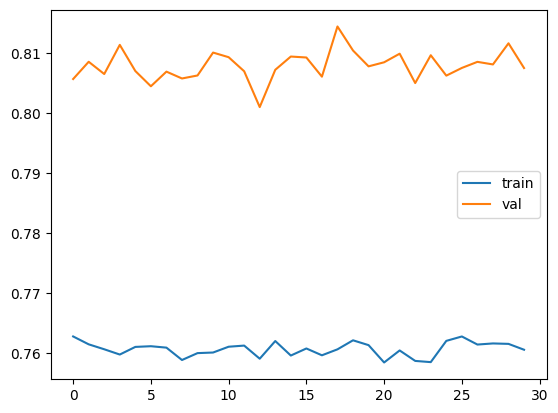

In [191]:
plt.plot(losses, label="train")
plt.plot(losses_val, label="val")
plt.legend()

In [192]:
loss_fn = torch.nn.MSELoss()

test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

running_loss = 0

results_target = []
results_output = []

for batch in test_loader:
    inputs, targets = batch

    outputs = linear_regression_model(inputs)
    loss = loss_fn(outputs, targets)

    results_target += targets.detach().numpy().tolist()
    results_output += outputs.detach().numpy().tolist()

    running_loss += loss.item()

    print(f'Loss: {loss.item():.4f}')

target_loss = running_loss / len(test_loader)

print(f'Target: {target_loss:.4f} Running Loss: {running_loss:.4f}')

/tmp/ipykernel_17221/2439019909.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


Loss: 0.9189
Loss: 0.3331
Loss: 0.9747
Loss: 0.3223
Loss: 1.2328
Loss: 0.4130
Loss: 0.7121
Loss: 0.5378
Loss: 0.2827
Loss: 1.2101
Loss: 1.1961
Loss: 0.5235
Loss: 0.7814
Loss: 0.5761
Loss: 0.4298
Loss: 0.6610
Loss: 0.6827
Loss: 0.5189
Loss: 0.4990
Loss: 0.8744
Loss: 0.9420
Loss: 0.3887
Loss: 0.5702
Loss: 0.2672
Loss: 0.4428
Loss: 3.2155
Loss: 0.5801
Loss: 0.6130
Loss: 0.4045
Loss: 0.6469
Loss: 0.5982
Loss: 0.5978
Loss: 0.1710
Loss: 0.6062
Loss: 0.3773
Loss: 0.5333
Loss: 0.3611
Loss: 0.5917
Loss: 0.3627
Loss: 0.3915
Loss: 0.7145
Loss: 0.6126
Loss: 0.7249
Loss: 0.6067
Loss: 0.5293
Loss: 0.1942
Loss: 8.2972
Loss: 0.3743
Loss: 0.7406
Loss: 1.0962
Loss: 1.1244
Loss: 0.2029
Loss: 0.1695
Loss: 0.3425
Loss: 0.3712
Loss: 0.4224
Loss: 0.6286
Loss: 0.9604
Loss: 0.7993
Loss: 0.2690
Loss: 0.6161
Loss: 0.2076
Loss: 1.2493
Loss: 0.2050
Loss: 0.2451
Loss: 0.6830
Loss: 1.1116
Loss: 0.6608
Loss: 1.5312
Loss: 0.6902
Loss: 0.2948
Loss: 1.1516
Loss: 0.4079
Loss: 1.5522
Loss: 0.2184
Loss: 0.3213
Loss: 0.3464

Loss: 1.7523
Loss: 0.4217
Loss: 0.3066
Loss: 0.4653
Loss: 0.7787
Loss: 0.6549
Loss: 0.7378
Loss: 0.7378
Loss: 0.1927
Loss: 1.9224
Loss: 0.3061
Loss: 0.5340
Loss: 0.3533
Loss: 0.2250
Loss: 0.7983
Loss: 0.6164
Loss: 0.7859
Loss: 0.2934
Loss: 0.8077
Loss: 0.2146
Loss: 0.3414
Loss: 0.8164
Loss: 0.2871
Loss: 0.2659
Loss: 0.3633
Loss: 0.6306
Loss: 7.3287
Loss: 2.2547
Loss: 0.3435
Loss: 0.8476
Loss: 0.1519
Loss: 0.5015
Loss: 0.5400
Loss: 0.3844
Loss: 0.2889
Loss: 0.4086
Loss: 0.4685
Loss: 0.9288
Loss: 0.3637
Loss: 0.2846
Loss: 0.6074
Loss: 1.5587
Loss: 0.5581
Loss: 0.6613
Loss: 0.6295
Loss: 0.9420
Loss: 0.2590
Loss: 1.2127
Loss: 0.6805
Loss: 0.2059
Loss: 0.2060
Loss: 0.7102
Loss: 0.3881
Loss: 0.4136
Loss: 0.4232
Loss: 0.4549
Loss: 0.2535
Loss: 6.6449
Loss: 0.3883
Loss: 1.1093
Loss: 0.5507
Loss: 0.4312
Loss: 0.3096
Loss: 0.3662
Loss: 0.5342
Loss: 2.0946
Loss: 0.8171
Loss: 2.5009
Loss: 0.3597
Loss: 0.5488
Loss: 0.4021
Loss: 0.2292
Loss: 0.3464
Loss: 1.7955
Loss: 0.3399
Loss: 1.8427
Loss: 1.2644

In [201]:
results_output_view = [((x[0] * std_norm) + mean_norm) for x in results_output]

In [202]:
results_target_view = [((x * std_norm) + mean_norm) for x in results_target]

In [203]:
len(results_output_view), len(results_target_view)

(62240, 62240)

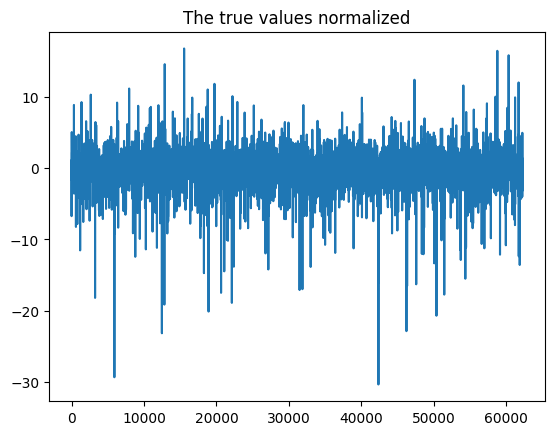

In [204]:
plt.title('The true values normalized')
plt.plot(range(len(results_target)), results_target)

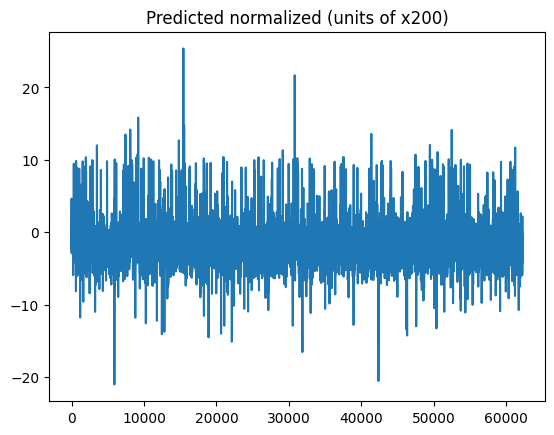

In [205]:
plt.title('Predicted normalized (units of x200)')
plt.plot(range(len(results_output)), [x[0] * 200 for x in results_output])

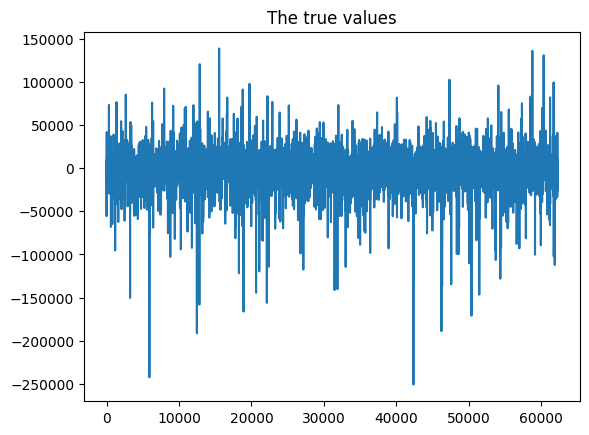

In [206]:
plt.title('The true values')
plt.plot(range(len(results_target_view)), results_target_view)

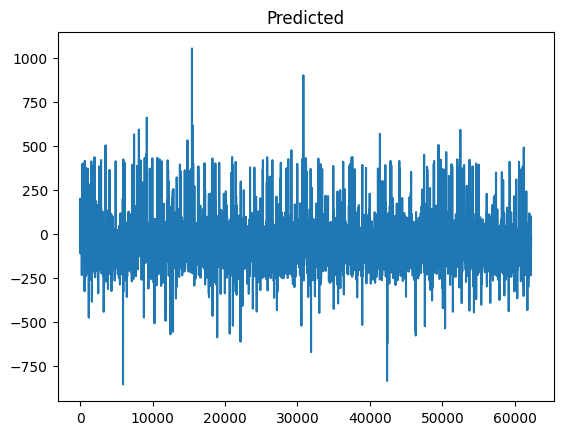

In [207]:
plt.title('Predicted')
plt.plot(range(len(results_output_view)), results_output_view)

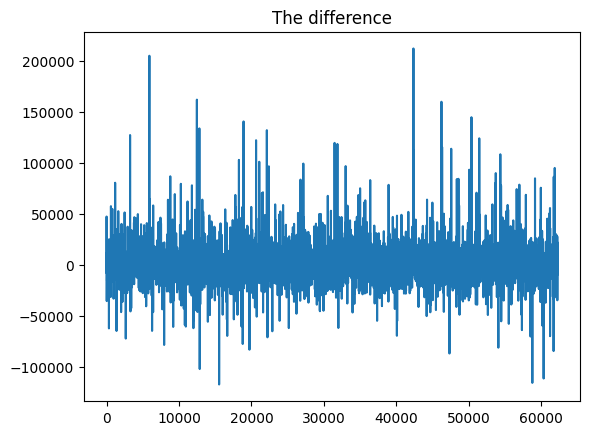

In [200]:
plt.title('The difference')
plt.plot(range(len(results_output_view)), [results_output_view[i] - results_target_view[i] for i in range(len(results_output_view))])

## LSTM Model

In [758]:
df = original_df.copy()

In [759]:
for store in df["Store"].unique():
    df["Store-" + str(store)] = (df["Store"] == store).map({True: 1, False: 0})

for dept in df["Dept"].unique():
    df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})

<ipython-input-759-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-759-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-759-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [760]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


In [761]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

<ipython-input-761-d96e69321d5b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["IsHoliday"] = df["IsHoliday_x"]


In [762]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

<ipython-input-762-d82d56fffdc2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Type"] = df["Type"]
<ipython-input-762-d82d56fffdc2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Size"] = df["Size"]


In [763]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [764]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

<ipython-input-764-cc26cbe55b12>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["index-2"] = df.index
<ipython-input-764-cc26cbe55b12>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)


In [765]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [766]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [767]:
df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)
df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)
df  = df.dropna()

<ipython-input-767-6ddc439288dd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)


In [768]:
df = df.drop(columns=["Weekly_Sales"])

In [769]:
df["Date"] = df["Date"].apply(lambda x: x.value)

In [770]:
df["Date"]

index-2
73       1265932800000000000
145      1266537600000000000
218      1267142400000000000
290      1267747200000000000
363      1268352000000000000
                ...         
84701    1323993600000000000
84767    1324598400000000000
84895    1325808000000000000
85083    1327622400000000000
86086    1337299200000000000
Name: Date, Length: 418239, dtype: int64

In [771]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

df['Year-Sin'] = np.sin(df["Date"] * (2 * np.pi / YEAR))
df['Year-Cos'] = np.cos(df["Date"] * (2 * np.pi / YEAR))

In [772]:
df=df.drop(columns=["Store","Dept","Store-Type","Store-Size",])
for column in df.columns:
  print(column)

Date
Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95


In [773]:
for column in df.columns:
  if(column!= "Store-Dept"):
    df[column] =df[column].astype(float)


In [774]:
lookback= 5
lookback_df=pd.DataFrame(df["Weekly-Diff"])
for i in range(lookback):
  for column in df.columns:
      lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
lookback_df.describe()

<ipython-input-774-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-774-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-774-880e18308f57>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Weekly-Diff    t( 1) Date  t( 1) Temperature  t( 1) Fuel_Price  \
count  418239.000000  4.182380e+05      418238.000000     418238.000000   
mean      -10.132176  1.308708e+18          60.285821          3.365862   
std      7206.831512  2.478287e+16          18.344008          0.456672   
min   -561345.540000  1.265933e+18          -2.060000          2.472000   
25%      -624.515000  1.287101e+18          47.090000          2.938000   
50%         1.290000  1.308874e+18          62.300000          3.461000   
75%       664.820000  1.330042e+18          74.370000          3.739000   
max    568347.700000  1.351210e+18         100.140000          4.468000   

           t( 1) CPI  t( 1) Unemployment  t( 1) Store-1  t( 1) Store-2  \
count  418238.000000       418238.000000  418238.000000  418238.000000   
mean      171.229769            7.955587       0.024307       0.024292   
std        39.165474            1.863359       0.154000       0.153956   
min       126.064000            3.879000       0.000000       0.000000   
25%       132.064433            6.891000       0.000000       0.000000   
50%       182.350989            7.866000       0.000000       0.000000   
75%       212.566881            8.567000       0.000000       0.000000   
max       227.232807           14.313000       1.000000       1.000000   

       t( 1) Store-3  t( 1) Store-4  ...  t( 5) Dept-99  t( 5) Dept-77  \
count  418238.000000  418238.000000  ...  418234.000000  418234.000000   
mean        0.021433       0.024374  ...       0.001973       0.000270   
std         0.144822       0.154207  ...       0.044370       0.016435   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

       t( 5) Dept-39  t( 5) Dept-50  t( 5) Dept-43  t( 5) Dept-65  \
count  418234.000000  418234.000000  418234.000000  418234.000000   
mean        0.000026       0.003701       0.000017       0.000340   
std         0.005128       0.060726       0.004091       0.018423   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       t( 5) IsHoliday  t( 5) Weekly-Diff  t( 5) Year-Sin  t( 5) Year-Cos  
count    418234.000000      418234.000000   418234.000000   418234.000000  
mean          0.070712         -10.123017        0.061025       -0.064965  
std           0.256343        7206.714596        0.706329        0.702251  
min           0.000000     -561345.540000       -0.999668       -1.000000  
25%           0.000000        -624.507500       -0.647161       -0.751132  
50%           0.000000           1.295000        0.136906       -0.128398  
75%           0.000000         664.815000        0.756771        0.627317  
max           1.000000      568347.700000        0.999963        0.999853  

[8 rows x 676 columns]

In [775]:
for column in lookback_df.columns:
    print(column)

Weekly-Diff
t( 1) Date
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1

In [776]:
# prompt: rename "Weekly-Diff" to "t( 0) Weekly-Diff"

lookback_df = lookback_df.rename(columns={"Weekly-Diff": "t( 0) Weekly-Diff"})
lookback_df["t( 0) Store-Dept"]= df["Store-Dept"]

In [777]:
# prompt: check if lookback_df has nulls and how many in each column

null_counts = lookback_df.isnull().sum()
for column, null_count in null_counts.items():
    print(f"Column: {column}, Null count: {null_count}")


Column: t( 0) Weekly-Diff, Null count: 0
Column: t( 1) Date, Null count: 1
Column: t( 1) Temperature, Null count: 1
Column: t( 1) Fuel_Price, Null count: 1
Column: t( 1) CPI, Null count: 1
Column: t( 1) Unemployment, Null count: 1
Column: t( 1) Store-1, Null count: 1
Column: t( 1) Store-2, Null count: 1
Column: t( 1) Store-3, Null count: 1
Column: t( 1) Store-4, Null count: 1
Column: t( 1) Store-5, Null count: 1
Column: t( 1) Store-6, Null count: 1
Column: t( 1) Store-7, Null count: 1
Column: t( 1) Store-8, Null count: 1
Column: t( 1) Store-9, Null count: 1
Column: t( 1) Store-10, Null count: 1
Column: t( 1) Store-11, Null count: 1
Column: t( 1) Store-12, Null count: 1
Column: t( 1) Store-13, Null count: 1
Column: t( 1) Store-14, Null count: 1
Column: t( 1) Store-15, Null count: 1
Column: t( 1) Store-16, Null count: 1
Column: t( 1) Store-17, Null count: 1
Column: t( 1) Store-18, Null count: 1
Column: t( 1) Store-19, Null count: 1
Column: t( 1) Store-20, Null count: 1
Column: t( 1) Stor

In [778]:
# prompt: drop all rows that have different values  in diifferent "t( i) Store-Dept" columns

lookback_df = lookback_df[lookback_df.apply(lambda row: all(row[f"t( {i+1}) Store-Dept"] == row["t( 0) Store-Dept"] for i in range(lookback)), axis=1)]
lookback_df = lookback_df.dropna()

In [779]:
lookback_df = lookback_df.drop(columns=[column for column in lookback_df.columns if "Store-Dept" in column])

In [780]:
lookback_df.head(5)["t( 2) Weekly-Diff"]

index-2
73    -22192.01
145     2424.36
218     -784.51
290     1093.25
363     4092.57
Name: t( 2) Weekly-Diff, dtype: float64

In [781]:
# prompt: split into train validation  and test based on "t( 5) Date" using 0.8 ratio

sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()
lookback_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()

lookback_df = lookback_df.reset_index()
sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()
val_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()

train_df = train_df.reset_index()
val_df = val_df.reset_index()


In [782]:
# prompt: drop all columns not starting with t in train_df val_df and final_test_df

train_df = train_df.drop(columns=[column for column in train_df.columns if not column.startswith("t")])
val_df = val_df.drop(columns=[column for column in val_df.columns if not column.startswith("t")])
final_test_df = final_test_df.drop(columns=[column for column in final_test_df.columns if not column.startswith("t")])


In [783]:
def drop_unneeded_columns(table):
   return table.drop(columns= [column for column in train_df.columns if ("Date" in column) ])


In [784]:
# prompt: apply  drop_unneeded_columns on train val and test

train_df =drop_unneeded_columns(train_df)
val_df = drop_unneeded_columns(val_df)
final_test_df = drop_unneeded_columns(final_test_df)


In [785]:
columns_per_row = [column for column in df.columns if "t( 1) "+column in train_df.columns]
columns_per_row.remove("Weekly-Diff")

In [786]:
for column in columns_per_row:
    print(column)

Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95
Dept-

In [787]:
len(columns_per_row)

133

In [788]:
for column in train_df.columns:
    print(column)

t( 0) Weekly-Diff
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1) Dep

In [789]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")

  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_mean_size = local_train_df[column].mean()
          x_std_size = local_train_df[column].std()

          local_train_df[column] = (local_train_df[column] - x_mean_size) / x_std_size
          local_val_df[column] = (local_val_df[column] - x_mean_size) / x_std_size
          local_test_df[column] = (local_test_df[column] - x_mean_size) / x_std_size

def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  mean_norm = local_train_df[test_col ].mean()
  std_norm = local_train_df[test_col ].std()

  local_train_df[test_col] = (local_train_df[test_col] - mean_norm) / std_norm
  local_val_df[test_col] = (local_val_df[test_col] - mean_norm) / std_norm
  local_test_df[test_col] = (local_test_df[test_col] - mean_norm) / std_norm

In [790]:
def get_data_for_model(local_lookback, table):
  x = np.zeros((len(table), local_lookback, len(columns_per_row)+1))
  y = np.zeros(len(table))
  for i in range(local_lookback):
    x[:,i,0] = table['t( '+str(i)+') Weekly-Diff']
    for j ,column in enumerate(columns_per_row):
      x[:,i,j+1]= table["t( "+str(i+1)+") "+column]
    y[:]= table["t( "+str(lookback)+") Weekly-Diff"]
  return x, y

In [791]:
def create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_train_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_train, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y_train, dtype=torch.float32).to(local_device))
  local_train_loader = torch.utils.data.DataLoader(local_train_dataset, batch_size=local_batch_size, shuffle=True)

  local_val_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_val, dtype=torch.float32).to(local_device),
                                                     torch.tensor(local_y_val, dtype=torch.float32).to(local_device))
  local_val_loader = torch.utils.data.DataLoader(local_val_dataset, batch_size=local_batch_size, shuffle=True)

  local_test_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_test, dtype=torch.float32).to(local_device),
                                                      torch.tensor(local_y_test, dtype=torch.float32).to(local_device))
  local_test_loader = torch.utils.data.DataLoader(local_test_dataset, batch_size=local_batch_size, shuffle=True)

  return local_batch_size, local_device, local_train_dataset, local_train_loader, local_val_dataset, local_val_loader, local_test_dataset, local_test_loader

In [792]:
def get_final_data_for_model(local_lookback, train_df, val_df, test_df):
  local_train_df = train_df.copy()
  local_val_df = val_df.copy()
  local_test_df = test_df.copy()

  normalize_x(local_lookback, local_train_df, local_val_df, local_test_df)
  normalize_y(local_lookback, local_train_df, local_val_df, local_test_df)
  print(local_train_df["t( 5) Weekly-Diff"].head(5),local_val_df["t( 5) Weekly-Diff"].head(5),local_test_df["t( 5) Weekly-Diff"].head(5))
  local_x_train, local_y_train = get_data_for_model(local_lookback, local_train_df)
  local_x_val, local_y_val = get_data_for_model(local_lookback, local_val_df)
  local_x_test, local_y_test = get_data_for_model(local_lookback, local_test_df)

  return create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test)

In [793]:
class LSTMModel(torch.nn.Module):
    def __init__(self,input_size,num_layers):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=50, num_layers=num_layers)
        self.linear = torch.nn.Linear(50, num_layers)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


def train_lstm_model(model, num_epochs,train_loader,test_loader):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = torch.nn.MSELoss().to(device)
    list_test_rmse= []
    list_train_rmse = []
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
              running_loss = 0
              for X_batch, y_batch in train_loader:
                y_pred = model(X_batch)
                train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += train_rmse
              train_rmse = running_loss/len(train_loader)

              running_loss = 0
              for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += test_rmse
              test_rmse = running_loss/len(test_loader)
            list_test_rmse.append(test_rmse)
            list_train_rmse.append(train_rmse)
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    return list_test_rmse, list_train_rmse

In [ ]:
print("Get the data for the Model")

batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

print("Create the Model")

model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

print("Training the Model")

test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

Get the data for the Model
Create the Model


IndexError: tuple index out of range

In [ ]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [ ]:
x_train[0,1,2]

In [ ]:
for X_batch, y_batch in train_loader:
  print(y_batch)
  break

In [794]:
def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_mean_norm = local_train_df[test_col].mean()
  y_std_norm = local_train_df[test_col].std()

  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm

In [ ]:
print("Get the data for the Model")

batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

print("Create the Model")

model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

print("Training the Model")

test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

Get the data for the Model
0   -0.010467
1   -0.010467
2   -0.010467
3   -0.010467
4   -0.010467
Name: t( 5) Weekly-Diff, dtype: float64 0     4382.24
1     8012.43
2    12467.11
3     1015.72
4   -23437.87
Name: t( 5) Weekly-Diff, dtype: float64 index-2
7960    -628.59
8031     799.84
8102    1016.76
8174     353.59
8245   -1554.24
Name: t( 5) Weekly-Diff, dtype: float64
Create the Model
Training the Model


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 5, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (5) must match the size of tensor b (32) at non-singleton dimension 2

In [ ]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [795]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")
  print(local_feature_columns)
  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_min = local_train_df[column].min()
          x_max = local_train_df[column].max()

          local_train_df[column] = (local_train_df[column] - x_min) / (x_max - x_min)
          local_val_df[column] = (local_val_df[column] - x_min) / (x_max - x_min)
          local_test_df[column] = (local_test_df[column] - x_min) / (x_max - x_min)


def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_min = local_train_df[test_col].min()
  y_max = local_train_df[test_col].max()

  local_train_df[test_col] = (local_train_df[test_col] - y_min) / (y_max - y_min)
  local_val_df[test_col] = (local_val_df[test_col] - y_min) / (y_max - y_min)
  local_test_df[test_col] = (local_test_df[test_col] - y_min) / (y_max - y_min)

In [796]:
class LSTMModel(torch.nn.Module):
  def __init__(self,device, input_size, num_layers):
    super().__init__()
    self.device = device
    self.input_size = input_size
    self.hidden_size = 50
    self.num_layers = num_layers
    self.lstm = torch.nn.LSTM(input_size=self.input_size,dropout=0.2, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first=True).to(self.device)
    self.output_layer = torch.nn.Linear(self.hidden_size, 1).to(self.device)

  def forward(self, x):
    hidden_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    cell_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    out, _ = self.lstm(x, (hidden_states, cell_states))
    out = self.output_layer(out[:, -1, :])
    return out.squeeze(1)


def train_lstm_model(model, num_epochs, train_loader, test_loader):
  i=0
  optimizer = torch.optim.Adam(model.parameters())
  loss_fn = torch.nn.MSELoss().to(device)
  list_test_rmse= []
  list_train_rmse = []
  for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
      y_pred = model(X_batch)
      loss = loss_fn(y_pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # Validation
    if epoch%3==0:
      model.eval()
      with torch.no_grad():
        running_loss = 0
        for X_batch, y_batch in train_loader:
          y_pred = model(X_batch)
          train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
          running_loss += train_rmse
        train_rmse = running_loss/len(train_loader)

        running_loss = 0
        for X_batch, y_batch in test_loader:
          y_pred = model(X_batch)

          test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
          running_loss += test_rmse

        test_rmse = running_loss/len(test_loader)

        list_test_rmse.append(test_rmse)
        list_train_rmse.append(train_rmse)
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

  return list_test_rmse, list_train_rmse

In [797]:
def create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_train_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_train, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y_train, dtype=torch.float32).to(local_device))
  local_train_loader = torch.utils.data.DataLoader(local_train_dataset, batch_size=local_batch_size, shuffle=True)

  local_val_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_val, dtype=torch.float32).to(local_device),
                                                     torch.tensor(local_y_val, dtype=torch.float32).to(local_device))
  local_val_loader = torch.utils.data.DataLoader(local_val_dataset, batch_size=local_batch_size, shuffle=True)

  local_test_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_test, dtype=torch.float32).to(local_device),
                                                      torch.tensor(local_y_test, dtype=torch.float32).to(local_device))
  local_test_loader = torch.utils.data.DataLoader(local_test_dataset, batch_size=local_batch_size, shuffle=True)

  return local_batch_size, local_device, local_x_train, local_train_dataset, local_train_loader, local_val_dataset, local_val_loader, local_test_dataset, local_test_loader

In [798]:
batch_size, device, x_train, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

['t( 0) Weekly-Diff', 't( 1) Temperature', 't( 1) Fuel_Price', 't( 1) CPI', 't( 1) Unemployment', 't( 1) Store-1', 't( 1) Store-2', 't( 1) Store-3', 't( 1) Store-4', 't( 1) Store-5', 't( 1) Store-6', 't( 1) Store-7', 't( 1) Store-8', 't( 1) Store-9', 't( 1) Store-10', 't( 1) Store-11', 't( 1) Store-12', 't( 1) Store-13', 't( 1) Store-14', 't( 1) Store-15', 't( 1) Store-16', 't( 1) Store-17', 't( 1) Store-18', 't( 1) Store-19', 't( 1) Store-20', 't( 1) Store-21', 't( 1) Store-22', 't( 1) Store-23', 't( 1) Store-24', 't( 1) Store-25', 't( 1) Store-26', 't( 1) Store-27', 't( 1) Store-28', 't( 1) Store-29', 't( 1) Store-30', 't( 1) Store-31', 't( 1) Store-32', 't( 1) Store-33', 't( 1) Store-34', 't( 1) Store-35', 't( 1) Store-36', 't( 1) Store-37', 't( 1) Store-38', 't( 1) Store-39', 't( 1) Store-40', 't( 1) Store-41', 't( 1) Store-42', 't( 1) Store-43', 't( 1) Store-44', 't( 1) Store-45', 't( 1) Dept-1', 't( 1) Dept-2', 't( 1) Dept-3', 't( 1) Dept-4', 't( 1) Dept-5', 't( 1) Dept-6', 't( 1

In [799]:
model = LSTMModel(device=device, input_size=x_train.shape[2], num_layers=3).to(device)

test_rmse , train_rmse = train_lstm_model(model, num_epochs=50, train_loader=train_loader, test_loader=val_loader)

Epoch 0: train RMSE 0.0052, test RMSE 0.0066
Epoch 3: train RMSE 0.0037, test RMSE 0.0053
Epoch 6: train RMSE 0.0034, test RMSE 0.0042
Epoch 9: train RMSE 0.0031, test RMSE 0.0038
Epoch 12: train RMSE 0.0030, test RMSE 0.0038
Epoch 15: train RMSE 0.0029, test RMSE 0.0037
Epoch 18: train RMSE 0.0031, test RMSE 0.0037
Epoch 21: train RMSE 0.0029, test RMSE 0.0035
Epoch 24: train RMSE 0.0028, test RMSE 0.0035
Epoch 27: train RMSE 0.0029, test RMSE 0.0035
Epoch 30: train RMSE 0.0027, test RMSE 0.0035
Epoch 33: train RMSE 0.0028, test RMSE 0.0035
Epoch 36: train RMSE 0.0026, test RMSE 0.0034
Epoch 39: train RMSE 0.0026, test RMSE 0.0034
Epoch 42: train RMSE 0.0026, test RMSE 0.0033
Epoch 45: train RMSE 0.0026, test RMSE 0.0035
Epoch 48: train RMSE 0.0029, test RMSE 0.0035


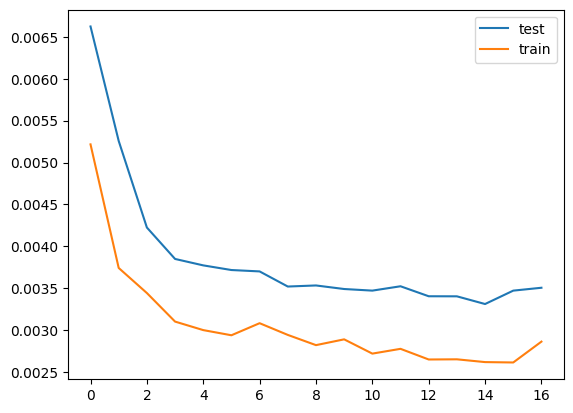

In [800]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [801]:
STORE = 1
DEPT = 1
view_train_df = train_df.copy()
view_val_df = val_df.copy()
view_test_df= final_test_df.copy()

In [802]:
# specific_view_train_df = view_train_df[(view_train_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_train_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# specific_view_val_df = view_val_df[(view_val_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_val_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# specific_view_test_df = view_test_df[(view_test_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_test_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# real_result_view = pd.concat([specific_view_train_df,specific_view_val_df,specific_view_test_df]).reset_index()
# #generate prediction
# train_pred_view = []
# val_pred_view = []
# test_pred_view = []


# plt.plot(real_result_view['t( '+str(lookback)+') Weekly-Diff'])

test RMSE 0.0026


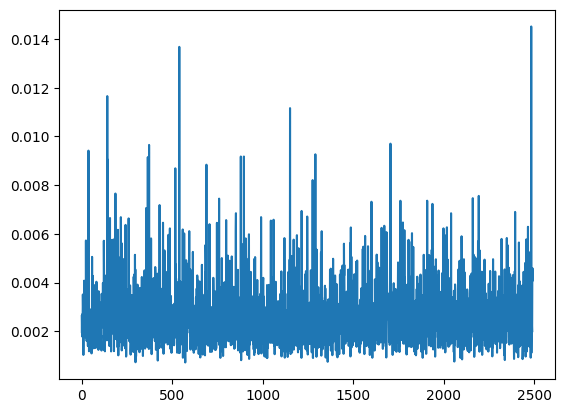

In [806]:
# final  loss
test_rmse_list = []

loss_fn = torch.nn.MSELoss().to(device)
model.eval()
for X_batch, y_batch in test_loader:
  y_pred = model(X_batch)
  test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
  test_rmse_list += [test_rmse]

test_rmse = sum(test_rmse_list) / len(test_rmse_list)

plt.plot(test_rmse_list, label="final test for loss")
print("test RMSE %.4f" % (test_rmse))

In [807]:
print("test RMSE %.4f" % (test_rmse))

test RMSE 0.0026


In [868]:
view_s_train_df = view_train_df.copy()
view_s_val_df = view_val_df.copy()
view_s_test_df = view_test_df.copy()

view_s_train_df = view_s_train_df[(view_s_train_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_train_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
view_s_val_df = view_s_val_df[(view_s_val_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_val_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
view_s_test_df = view_s_test_df[(view_s_test_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_test_df["t( 1) Dept-"+str(DEPT)+""] == 1)]

In [869]:
view_s_train_df

t( 0) Weekly-Diff  t( 1) Temperature  t( 1) Fuel_Price   t( 1) CPI  \
0            21114.99              39.93             2.514  211.289143   
1            -4443.94              46.63             2.561  211.319643   
2           -22192.01              46.50             2.625  211.350143   
3             2424.36              57.79             2.667  211.380643   
4             -784.51              54.58             2.720  211.215635   
..                ...                ...               ...         ...   
84            -676.18              79.69             3.355  216.710597   
85             478.38              69.31             3.285  217.045368   
86            2459.90              71.74             3.274  217.355273   
87            2279.97              63.71             3.353  217.515976   
88             274.25              66.57             3.372  217.676679   

    t( 1) Unemployment  t( 1) Store-1  t( 1) Store-2  t( 1) Store-3  \
0                8.106            1.0            0.0            0.0   
1                8.106            1.0            0.0            0.0   
2                8.106            1.0            0.0            0.0   
3                8.106            1.0            0.0            0.0   
4                8.106            1.0            0.0            0.0   
..                 ...            ...            ...            ...   
84               7.962            1.0            0.0            0.0   
85               7.866            1.0            0.0            0.0   
86               7.866            1.0            0.0            0.0   
87               7.866            1.0            0.0            0.0   
88               7.866            1.0            0.0            0.0   

    t( 1) Store-4  t( 1) Store-5  ...  t( 5) Dept-99  t( 5) Dept-77  \
0             0.0            0.0  ...            0.0            0.0   
1             0.0            0.0  ...            0.0            0.0   
2             0.0            0.0  ...            0.0            0.0   
3             0.0            0.0  ...            0.0            0.0   
4             0.0            0.0  ...            0.0            0.0   
..            ...            ...  ...            ...            ...   
84            0.0            0.0  ...            0.0            0.0   
85            0.0            0.0  ...            0.0            0.0   
86            0.0            0.0  ...            0.0            0.0   
87            0.0            0.0  ...            0.0            0.0   
88            0.0            0.0  ...            0.0            0.0   

    t( 5) Dept-39  t( 5) Dept-50  t( 5) Dept-43  t( 5) Dept-65  \
0             0.0            0.0            0.0            0.0   
1             0.0            0.0            0.0            0.0   
2             0.0            0.0            0.0            0.0   
3             0.0            0.0            0.0            0.0   
4             0.0            0.0            0.0            0.0   
..            ...            ...            ...            ...   
84            0.0            0.0            0.0            0.0   
85            0.0            0.0            0.0            0.0   
86            0.0            0.0            0.0            0.0   
87            0.0            0.0            0.0            0.0   
88            0.0            0.0            0.0            0.0   

    t( 5) IsHoliday  t( 5) Weekly-Diff  t( 5) Year-Sin  t( 5) Year-Cos  
0               0.0            1093.25        0.722117        0.691771  
1               0.0            4092.57        0.799839        0.600214  
2               0.0           31029.22        0.866025        0.500000  
3               0.0          -14297.52        0.919720        0.392574  
4               0.0          -25363.95        0.960150        0.279486  
..              ...                ...             ...             ...  
84              0.0            8228.10       -0.995546       -0.094279  
85              0.0            8

In [870]:
def final_normalize_x(local_lookback, local_train_df, local_target_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")
  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_min = local_train_df[column].min()
          x_max = local_train_df[column].max()

          local_target_df[column] = (local_target_df[column] - x_min) / (x_max - x_min)


def final_normalize_y(local_lookback, local_train_df, local_target_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_min = local_train_df[test_col].min()
  y_max = local_train_df[test_col].max()

  local_target_df[test_col] = (local_target_df[test_col] - y_min) / (y_max - y_min)

  return y_min, y_max


def get_data_for_model(local_lookback, table):
  x = np.zeros((len(table), local_lookback, len(columns_per_row)+1))
  y = np.zeros(len(table))
  for i in range(local_lookback):
    x[:,i,0] = table['t( '+str(i)+') Weekly-Diff']

    for j ,column in enumerate(columns_per_row):
      x[:,i,j+1]= table["t( "+str(i+1)+") "+column]

    y[:]= table["t( "+str(lookback)+") Weekly-Diff"]

  return x, y

def create_train_test_loaders(local_x, local_y):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y, dtype=torch.float32).to(local_device))
  local_loader = torch.utils.data.DataLoader(local_dataset, batch_size=local_batch_size)

  return local_dataset, local_loader

In [871]:
final_normalize_x(lookback, view_train_df, view_s_train_df)
final_normalize_x(lookback, view_train_df, view_s_val_df)
final_normalize_x(lookback, view_train_df, view_s_test_df)

y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_train_df)
y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_val_df)
y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_test_df)

view_x_train, view_y_train = get_data_for_model(lookback, view_s_train_df)
view_x_val, view_y_val = get_data_for_model(lookback, view_s_val_df)
view_x_test, view_y_test = get_data_for_model(lookback, view_s_test_df)

view_train_dataset, view_train_loader = create_train_test_loaders(view_x_train, view_y_train)
view_val_dataset, view_val_loader = create_train_test_loaders(view_x_val, view_y_val)
view_test_dataset, view_test_loader = create_train_test_loaders(view_x_test, view_y_test)

In [872]:
# final test
sections = [view_train_loader, view_val_loader, view_test_loader]

y_pred_list = []
y_true_list = []

loss_fn = torch.nn.MSELoss().to(device)

model.eval()

for section_loader in sections:
  y_pred_section_list = []
  y_true_section_list = []
  for x, y in section_loader:
    y_pred = model(x)
    y_pred_section_list += list(map(float, list(y_pred)))
    y_true_section_list += list(map(float, list(y)))

  y_pred_list += [y_pred_section_list]
  y_true_list += [y_true_section_list]


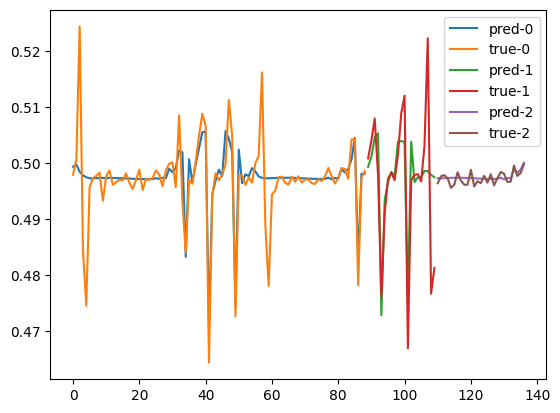

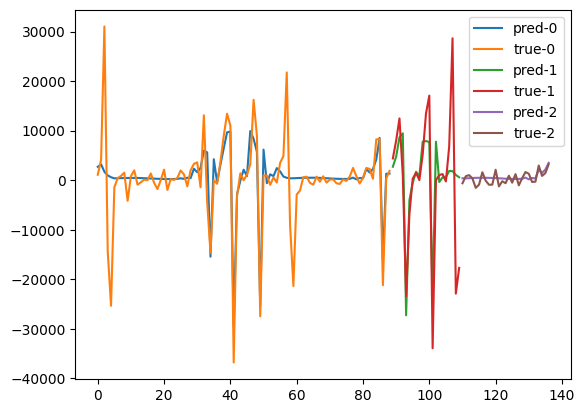

In [873]:
j = 0
for i in range(len(sections)):
  y_pred_section_list = y_pred_list[i]
  y_true_section_list = y_true_list[i]

  plt.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
  plt.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

  j += len(y_pred_section_list)

plt.legend()
plt.show()

j = 0
for i in range(len(sections)):
  y_pred_section_list = y_pred_list[i]
  y_true_section_list = y_true_list[i]

  y_pred_section_list = [y_min + (y_max - y_min) * v for v in y_pred_section_list]
  y_true_section_list = [y_min + (y_max - y_min) * v for v in y_true_section_list]

  plt.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
  plt.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

  j += len(y_pred_section_list)

plt.legend()
plt.show()

In [886]:
def plot_test_lstm(store, dept):
  # view
  view_s_train_df = view_train_df.copy()
  view_s_val_df = view_val_df.copy()
  view_s_test_df = view_test_df.copy()

  view_s_train_df = view_s_train_df[(view_s_train_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_train_df["t( 1) Dept-"+str(dept)+""] == 1)]
  view_s_val_df = view_s_val_df[(view_s_val_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_val_df["t( 1) Dept-"+str(dept)+""] == 1)]
  view_s_test_df = view_s_test_df[(view_s_test_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_test_df["t( 1) Dept-"+str(dept)+""] == 1)]

  # load
  final_normalize_x(lookback, view_train_df, view_s_train_df)
  final_normalize_x(lookback, view_train_df, view_s_val_df)
  final_normalize_x(lookback, view_train_df, view_s_test_df)

  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_train_df)
  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_val_df)
  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_test_df)

  view_x_train, view_y_train = get_data_for_model(lookback, view_s_train_df)
  view_x_val, view_y_val = get_data_for_model(lookback, view_s_val_df)
  view_x_test, view_y_test = get_data_for_model(lookback, view_s_test_df)

  view_train_dataset, view_train_loader = create_train_test_loaders(view_x_train, view_y_train)
  view_val_dataset, view_val_loader = create_train_test_loaders(view_x_val, view_y_val)
  view_test_dataset, view_test_loader = create_train_test_loaders(view_x_test, view_y_test)

  # test all
  sections = [view_train_loader, view_val_loader, view_test_loader]

  y_pred_list = []
  y_true_list = []

  loss_fn = torch.nn.MSELoss().to(device)

  model.eval()

  for section_loader in sections:
    y_pred_section_list = []
    y_true_section_list = []
    for x, y in section_loader:
      y_pred = model(x)
      y_pred_section_list += list(map(float, list(y_pred)))
      y_true_section_list += list(map(float, list(y)))

    y_pred_list += [y_pred_section_list]
    y_true_list += [y_true_section_list]

  # view
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  j = 0
  for i in range(len(sections)):
    y_pred_section_list = y_pred_list[i]
    y_true_section_list = y_true_list[i]

    ax1.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
    ax1.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

    j += len(y_pred_section_list)

  ax1.legend()

  j = 0
  for i in range(len(sections)):
    y_pred_section_list = y_pred_list[i]
    y_true_section_list = y_true_list[i]

    y_pred_section_list = [y_min + (y_max - y_min) * v for v in y_pred_section_list]
    y_true_section_list = [y_min + (y_max - y_min) * v for v in y_true_section_list]

    ax2.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
    ax2.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

    j += len(y_pred_section_list)

  ax2.legend()

  plt.show()

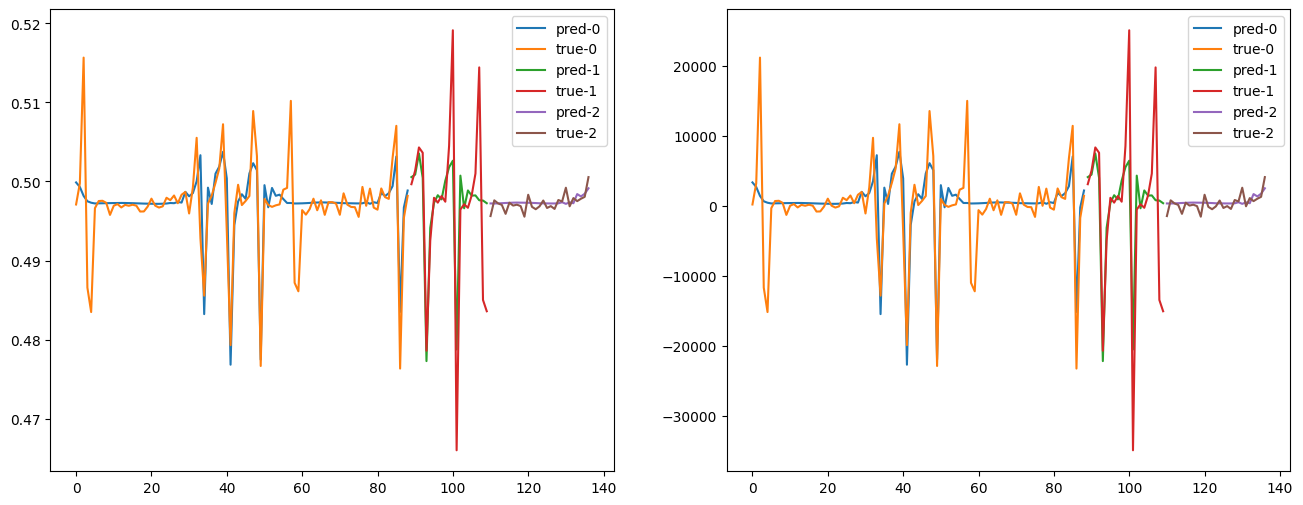

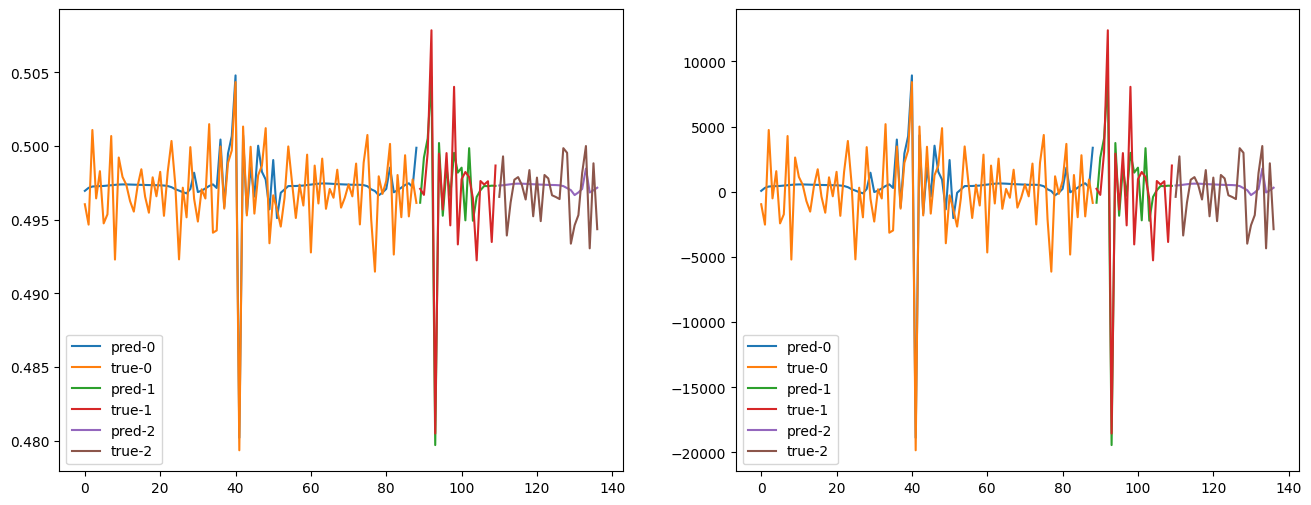

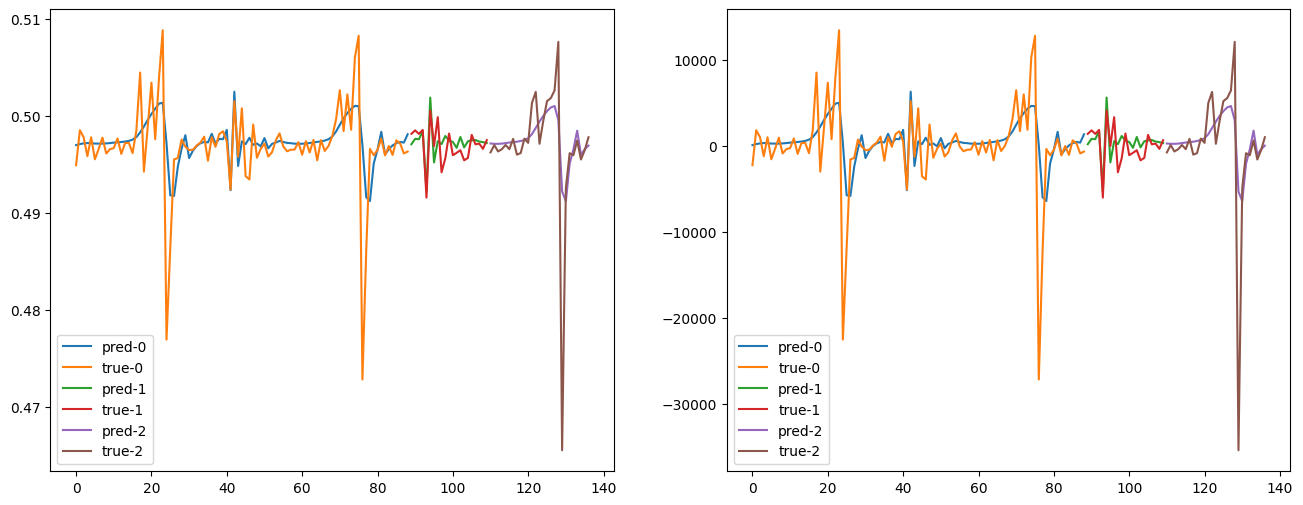

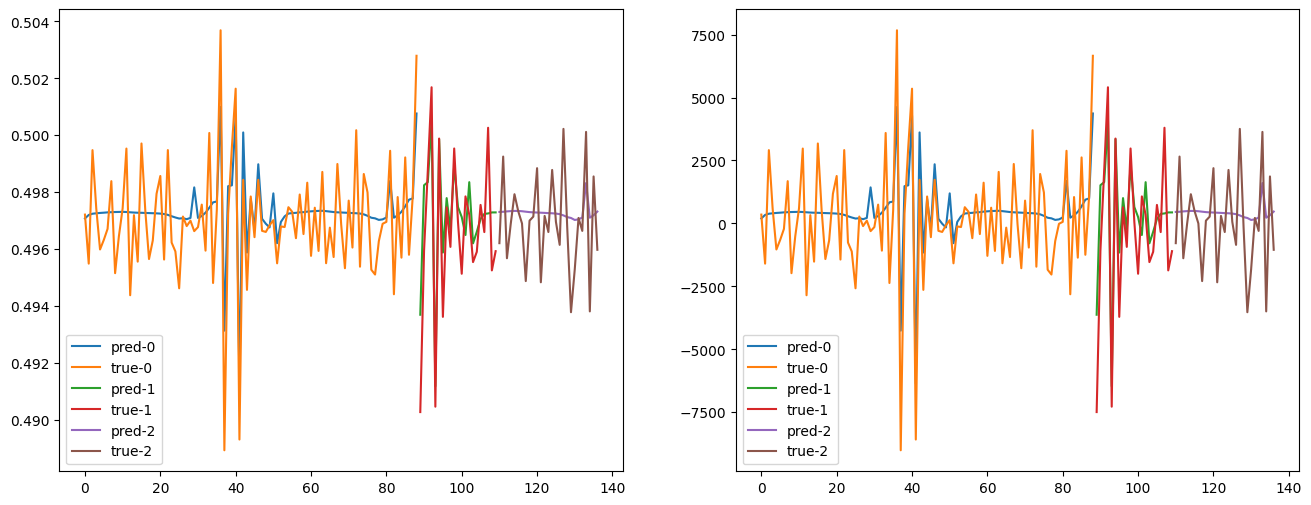

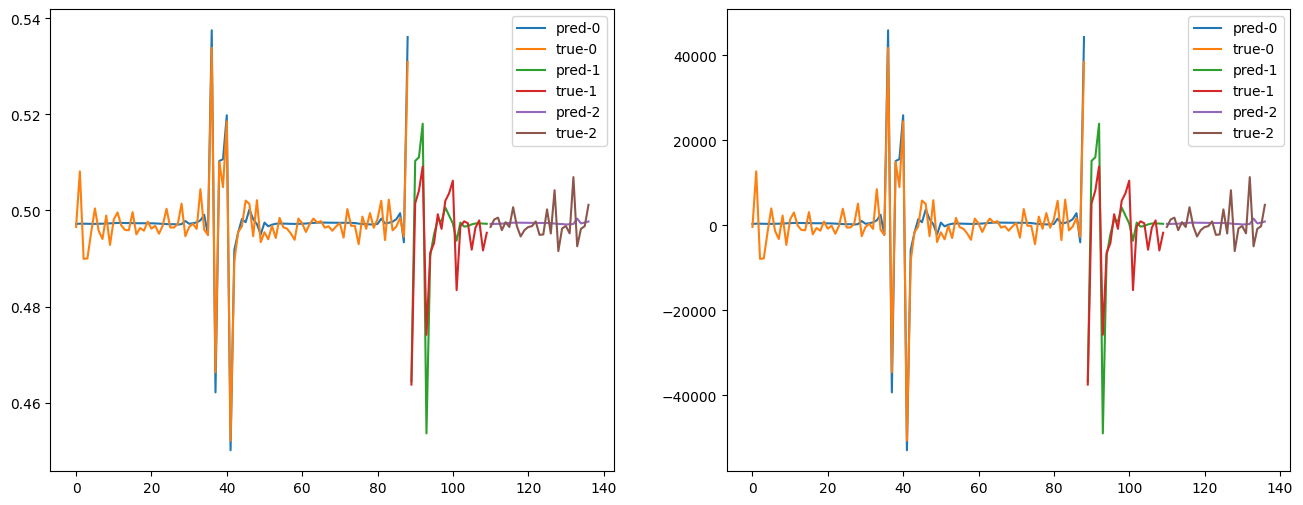

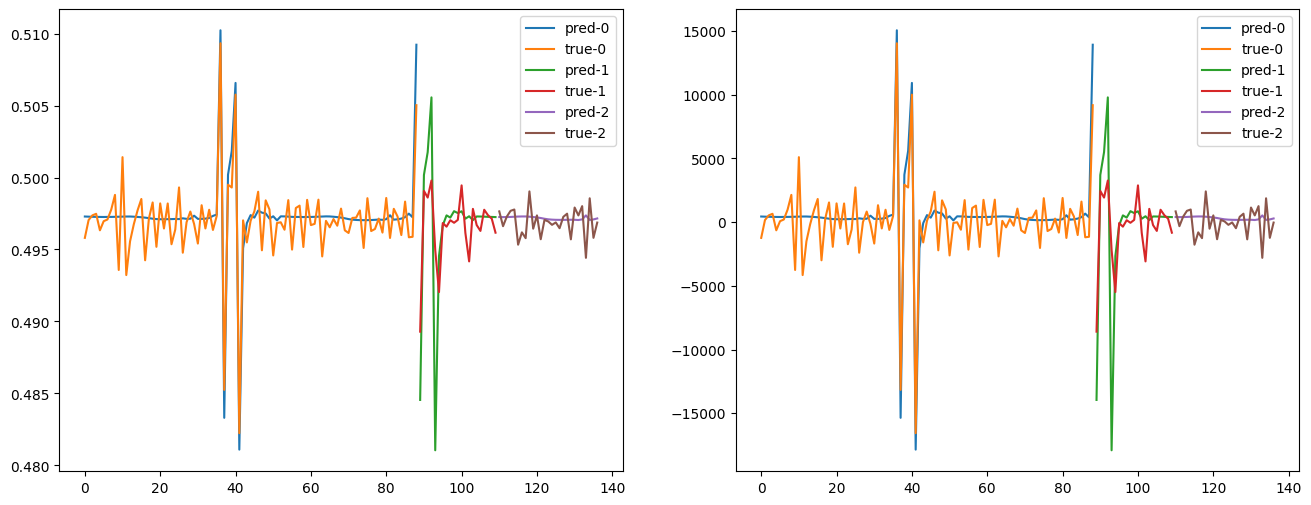

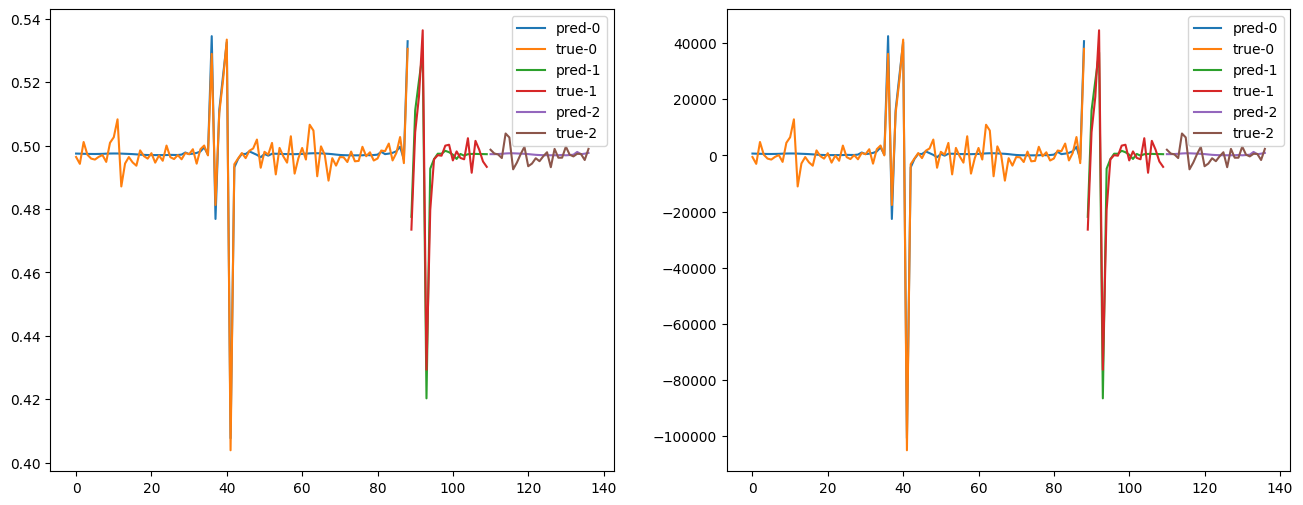

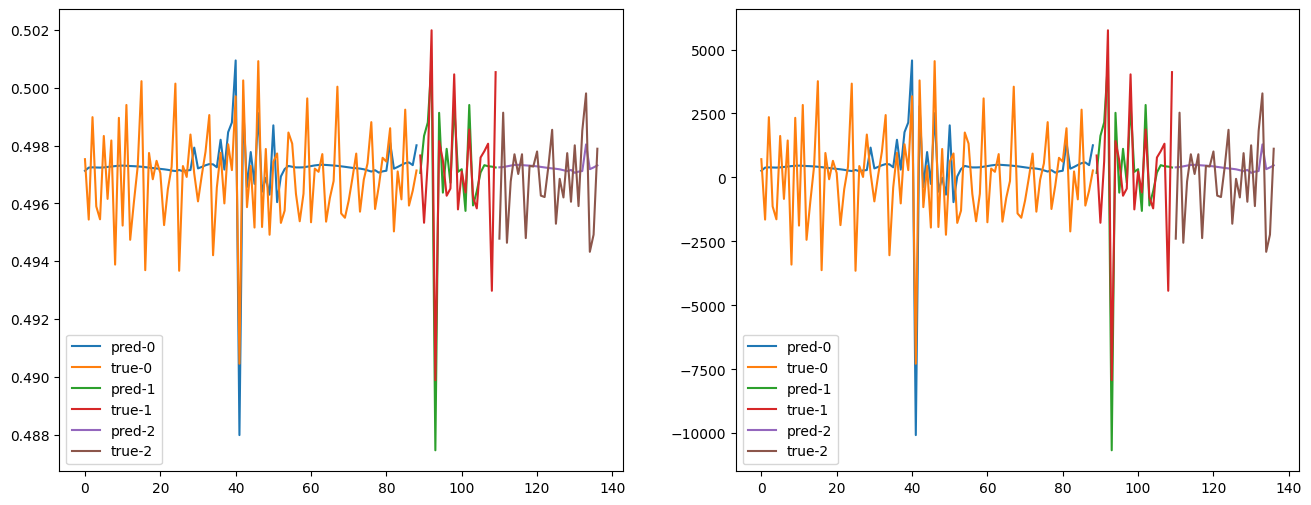

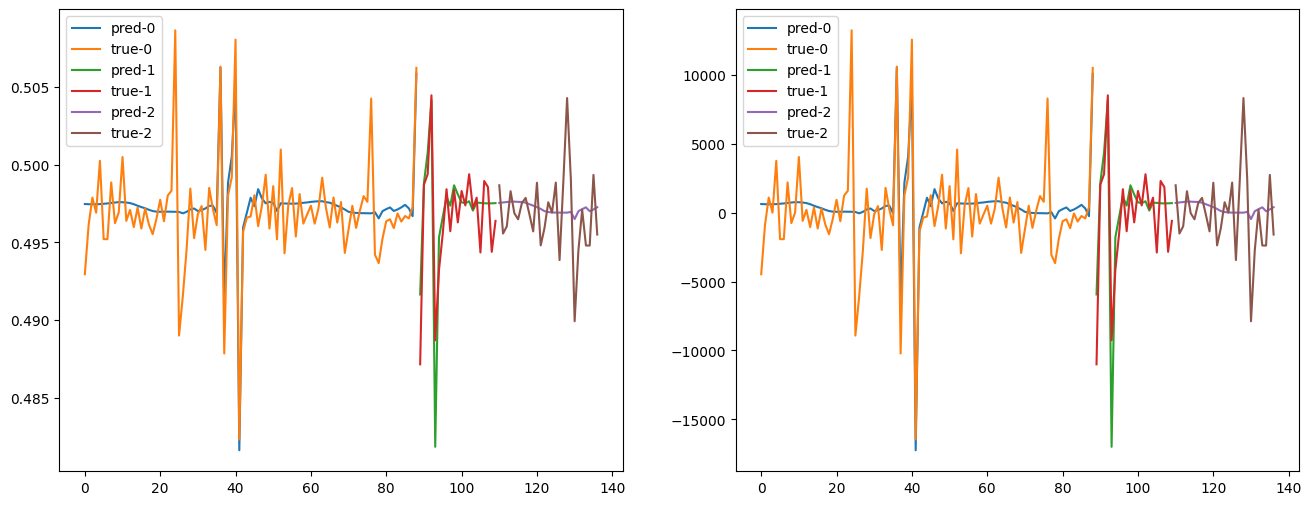

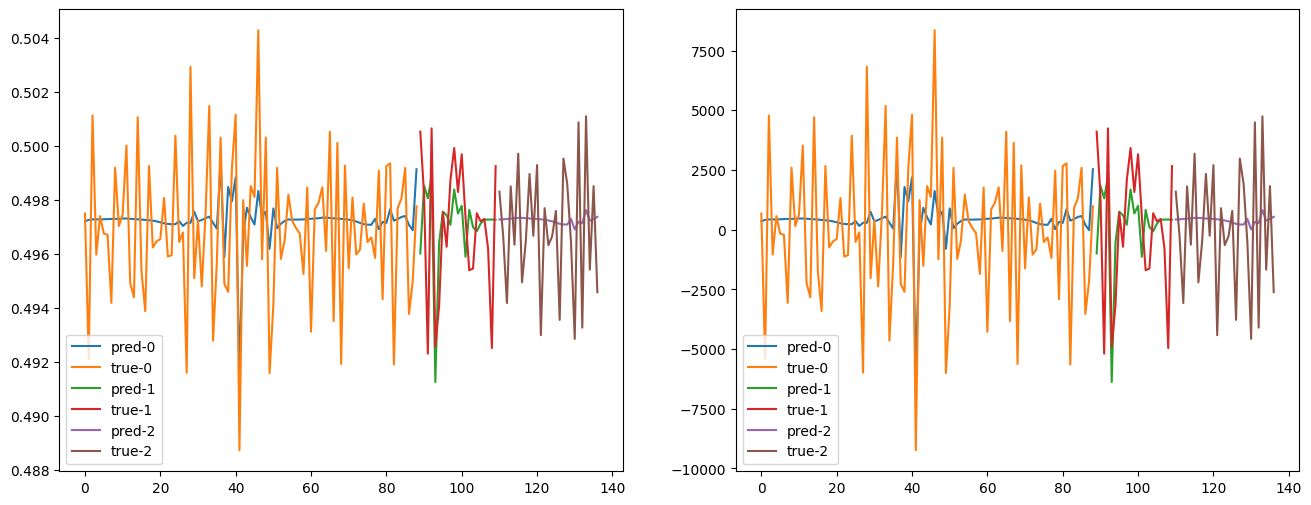

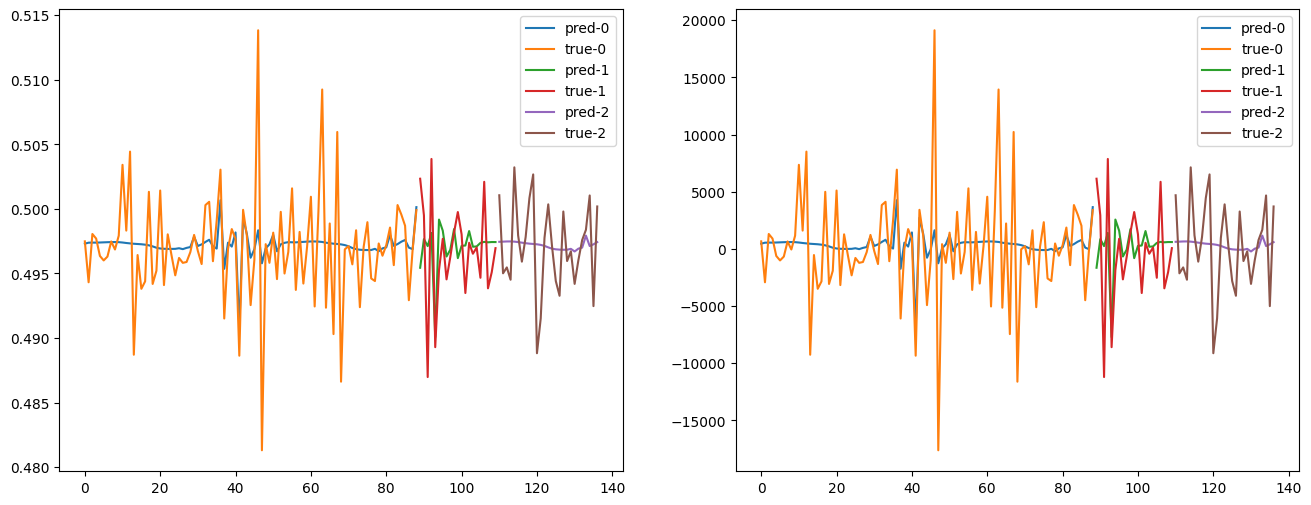

In [894]:
for i in range(1, 12):
  plot_test_lstm(8, i)